In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

import os
import gc
from pathlib import Path

from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from windrose import WindroseAxes

In [2]:
root = Path('/workspace/Ashrae-Energy-Prediction-III/src/data') # Change the path to the source file path, use Memory_Management.py to generate files in feather format 
train_df = pd.read_feather(root/'train.feather')
weather_train_df = pd.read_feather(root/'weather_train.feather')
building_meta_df = pd.read_feather(root/'building_metadata.feather')

In [3]:
print('\n--- Shape of train data ---\n', train_df.shape)


--- Shape of train data ---
 (20216100, 4)


In [4]:
print('\n---Information of the train data --- \n')
print(train_df.info())


---Information of the train data --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int16         
 1   meter          int8          
 2   timestamp      datetime64[ns]
 3   meter_reading  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB
None


In [5]:
print('\n ---Column names of the train data --- \n', train_df.columns)


 ---Column names of the train data --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')


In [6]:
print('\n---Below is the statistics of the train data---\n\n',train_df.describe())


---Below is the statistics of the train data---

         building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117122e+03
std    4.269133e+02  9.309921e-01   1.532356e+05
min    0.000000e+00  0.000000e+00   0.000000e+00
25%    3.930000e+02  0.000000e+00   1.830000e+01
50%    8.950000e+02  0.000000e+00   7.877500e+01
75%    1.179000e+03  1.000000e+00   2.679840e+02
max    1.448000e+03  3.000000e+00   2.190470e+07


In [7]:
print('\n---Below is the first 5 lines of the train data---\n',train_df.head(5))


---Below is the first 5 lines of the train data---
    building_id  meter  timestamp  meter_reading
0            0      0 2016-01-01            0.0
1            1      0 2016-01-01            0.0
2            2      0 2016-01-01            0.0
3            3      0 2016-01-01            0.0
4            4      0 2016-01-01            0.0


In [8]:
print('\n--- Shape of weather train data---\n', weather_train_df.shape)


--- Shape of weather train data---
 (139773, 9)


In [9]:
print('\n---Information of the weather train dataset --- \n')
print(weather_train_df.info())


---Information of the weather train dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int8          
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float32       
 3   cloud_coverage      70600 non-null   float32       
 4   dew_temperature     139660 non-null  float32       
 5   precip_depth_1_hr   89484 non-null   float32       
 6   sea_level_pressure  129155 non-null  float32       
 7   wind_direction      133505 non-null  float32       
 8   wind_speed          139469 non-null  float32       
dtypes: datetime64[ns](1), float32(7), int8(1)
memory usage: 4.9 MB
None


In [10]:
print('\n ---Column names of the weather train dataset --- \n', weather_train_df.columns)


 ---Column names of the weather train dataset --- 
 Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')


In [11]:
print('\n---Below is the statistics of the weather train dataset---\n\n',weather_train_df.describe())


---Below is the statistics of the weather train dataset---

              site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418107        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200001        4.000000        14.400000   
max        15.000000        47.200001        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  
count       89484.000000       129155.000000   133505.000000  139469.000000  
mean            0.983047         1016.158081      180.526627       3.560527  
std             8.463677            7

In [12]:
print('\n---Below is the first 5 lines of the weather train dataset---\n',weather_train_df.head(5))


---Below is the first 5 lines of the weather train dataset---
    site_id           timestamp  air_temperature  cloud_coverage  \
0        0 2016-01-01 00:00:00        25.000000             6.0   
1        0 2016-01-01 01:00:00        24.400000             NaN   
2        0 2016-01-01 02:00:00        22.799999             2.0   
3        0 2016-01-01 03:00:00        21.100000             2.0   
4        0 2016-01-01 04:00:00        20.000000             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN         1019.700012             0.0   
1             21.1               -1.0         1020.200012            70.0   
2             21.1                0.0         1020.200012             0.0   
3             20.6                0.0         1020.099976             0.0   
4             20.0               -1.0         1020.000000           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3     

In [13]:
print('\n--- Shape of building_meta data---\n', building_meta_df.shape)


--- Shape of building_meta data---
 (1449, 6)


In [14]:
print('\n---Information of the building metadata dataset --- \n')
print(building_meta_df.info())


---Information of the building metadata dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   site_id      1449 non-null   int8    
 1   building_id  1449 non-null   int16   
 2   primary_use  1449 non-null   category
 3   square_feet  1449 non-null   int32   
 4   year_built   675 non-null    float32 
 5   floor_count  355 non-null    float32 
dtypes: category(1), float32(2), int16(1), int32(1), int8(1)
memory usage: 23.4 KB
None


In [15]:
print('\n ---Column names of the building meta dataset --- \n', building_meta_df.columns)


 ---Column names of the building meta dataset --- 
 Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')


In [16]:
print('\n---Below is the statistics of the building meta dataset---\n\n',building_meta_df.describe())


---Below is the statistics of the building meta dataset---

            site_id  building_id    square_feet   year_built  floor_count
count  1449.000000  1449.000000    1449.000000   675.000000   355.000000
mean      6.952381   724.000000   92111.776398  1967.957031     3.740845
std       5.003432   418.434583  110769.950997    31.054029     3.333683
min       0.000000     0.000000     283.000000  1900.000000     1.000000
25%       3.000000   362.000000   23012.000000  1949.000000     1.000000
50%       5.000000   724.000000   57673.000000  1970.000000     3.000000
75%      13.000000  1086.000000  115676.000000  1995.000000     5.000000
max      15.000000  1448.000000  875000.000000  2017.000000    26.000000


In [17]:
print('\n---Below is the first 5 lines of the building meta dataset---\n',building_meta_df.head(5))


---Below is the first 5 lines of the building meta dataset---
    site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


Reducing the memory usage of the data 

In [18]:
def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(
        100 * (start_mem - end_mem) / start_mem))

    return df

In [19]:
train_df=reduce_mem_usage(train_df)
weather_train_df=reduce_mem_usage(weather_train_df)
building_meta_df=reduce_mem_usage(building_meta_df)

Memory usage of dataframe is 289.19 MB
Memory usage after optimization is: 289.19 MB
Decreased by 0.0%
Memory usage of dataframe is 4.93 MB
Memory usage after optimization is: 4.93 MB
Decreased by 0.0%
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.02 MB
Decreased by 0.0%


Merging data 

In [20]:
train_merge = train_df.merge(building_meta_df, on='building_id', how='left')
train_merge = train_merge.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')

In [21]:
train_merge=reduce_mem_usage(train_merge)

gc.collect()

Memory usage of dataframe is 1253.17 MB
Memory usage after optimization is: 1253.17 MB
Decreased by 0.0%


0

In [22]:
print('\n--- Shape of merging data---\n', train_merge.shape)


--- Shape of merging data---
 (20216100, 16)


In [23]:
print('\n---Information of the train merged dataset --- \n')
print(train_merge.info())


---Information of the train merged dataset --- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   timestamp           datetime64[ns]
 3   meter_reading       float32       
 4   site_id             int8          
 5   primary_use         category      
 6   square_feet         int32         
 7   year_built          float32       
 8   floor_count         float32       
 9   air_temperature     float32       
 10  cloud_coverage      float32       
 11  dew_temperature     float32       
 12  precip_depth_1_hr   float32       
 13  sea_level_pressure  float32       
 14  wind_direction      float32       
 15  wind_speed          float32       
dtypes: category(1), datetime64[ns](1), float32(10), int16(1), int32(1), int8(2)
memory usage: 1.2 GB
None


In [24]:
print('\n ---Column names of the train merged dataset --- \n', train_merge.columns)


 ---Column names of the train merged dataset --- 
 Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')


In [25]:
print('\n---Below is the statistics of the train merged dataset---\n\n',train_merge.describe())


---Below is the statistics of the train merged dataset---

         building_id         meter  meter_reading       site_id   square_feet  \
count  2.021610e+07  2.021610e+07   2.021610e+07  2.021610e+07  2.021610e+07   
mean   7.992780e+02  6.624412e-01   2.117122e+03  7.992232e+00  1.077830e+05   
std    4.269133e+02  9.309921e-01   1.532356e+05  5.099060e+00  1.171424e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  2.830000e+02   
25%    3.930000e+02  0.000000e+00   1.830000e+01  3.000000e+00  3.252700e+04   
50%    8.950000e+02  0.000000e+00   7.877500e+01  9.000000e+00  7.270900e+04   
75%    1.179000e+03  1.000000e+00   2.679840e+02  1.300000e+01  1.391130e+05   
max    1.448000e+03  3.000000e+00   2.190470e+07  1.500000e+01  8.750000e+05   

         year_built   floor_count  air_temperature  cloud_coverage  \
count  8.088455e+06  3.506933e+06     2.011944e+07    1.139074e+07   
mean   1.968276e+03  4.184848e+00     1.598795e+01    1.900424e+00   
std    3

By looking at the train_merge data, the large difference between mean and max for meter_reading showing there are some strong outliers.

In [26]:
print('\n---Below is the first 5 lines of the train merged dataset---\n',train_merge.head(5))


---Below is the first 5 lines of the train merged dataset---
    building_id  meter  timestamp  meter_reading  site_id primary_use  \
0            0      0 2016-01-01            0.0        0   Education   
1            1      0 2016-01-01            0.0        0   Education   
2            2      0 2016-01-01            0.0        0   Education   
3            3      0 2016-01-01            0.0        0   Education   
4            4      0 2016-01-01            0.0        0   Education   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  \
0         7432      2008.0          NaN             25.0             6.0   
1         2720      2004.0          NaN             25.0             6.0   
2         5376      1991.0          NaN             25.0             6.0   
3        23685      2002.0          NaN             25.0             6.0   
4       116607      1975.0          NaN             25.0             6.0   

   dew_temperature  precip_depth_1_hr  sea_leve

In [27]:
meter_values = train_merge['meter'].unique()
site_id_values =train_merge['site_id'].unique()
building_id_values = train_merge['building_id'].unique()
primary_use_values = train_merge['primary_use'].unique()
year_built_values = train_merge['year_built'].unique()

building_id_values.sort()
year_built_values.sort()

# Print the results
print("Unique meter values:", meter_values)
print("Unique site_id values:", site_id_values)
print("Unique building_id values:", building_id_values)
print("Unique primary_use values:", primary_use_values)
print("Unique year_built values (sorted):", year_built_values)

Unique meter values: [0 3 1 2]
Unique site_id values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Unique building_id values: [   0    1    2 ... 1446 1447 1448]
Unique primary_use values: ['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly', 'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science', 'Utility', 'Warehouse/storage']
Unique year_built values (sorted): [1900. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912.
 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1944. 1945. 1946. 1947. 1948. 1949.
 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 

In [28]:
# Create a dictionary to map old column names to new ones
new_column_names = {col: col.replace('_', ' ') for col in train_merge.columns}
new1_column_names = {col: col.replace('_', ' ') for col in train_df.columns}
new2_column_names = {col: col.replace('_', ' ') for col in weather_train_df.columns}
new3_column_names = {col: col.replace('_', ' ') for col in building_meta_df.columns}
# Rename the columns using the dictionary
train_merge = train_merge.rename(columns=new_column_names)
train_df = train_df.rename(columns=new1_column_names)
weather_train_df = weather_train_df.rename(columns=new2_column_names)
building_meta_df = building_meta_df.rename(columns=new3_column_names)

# Correlation 

/tmp/ipykernel_41843/442709645.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train=train_df.corr().round(2)


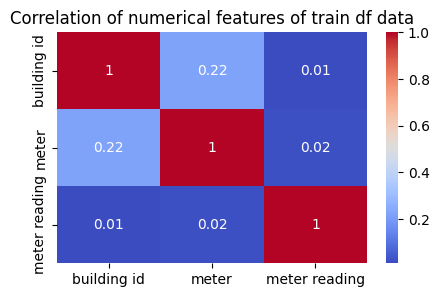

In [29]:
corr_train=train_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_train,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train df data')
plt.show()

/tmp/ipykernel_41843/1256712279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_weather=weather_train_df.corr().round(2)


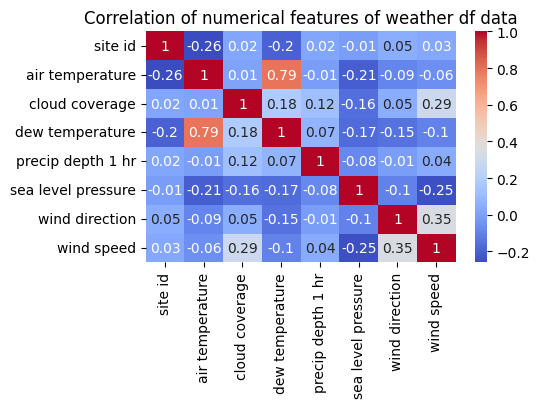

In [30]:
corr_weather=weather_train_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_weather,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of weather df data')
plt.show()

/tmp/ipykernel_41843/1550760386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_building=building_meta_df.corr().round(2)


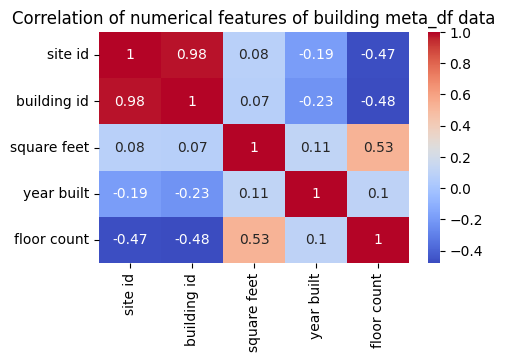

In [31]:
corr_building=building_meta_df.corr().round(2)

fig, ax = plt.subplots(figsize=(5,3))  
sns.heatmap(corr_building,annot=True,ax=ax,cmap='coolwarm')
ax.set_title('Correlation of numerical features of building meta_df data')
plt.show()

/tmp/ipykernel_41843/1255999807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=train_merge.corr().round(2)


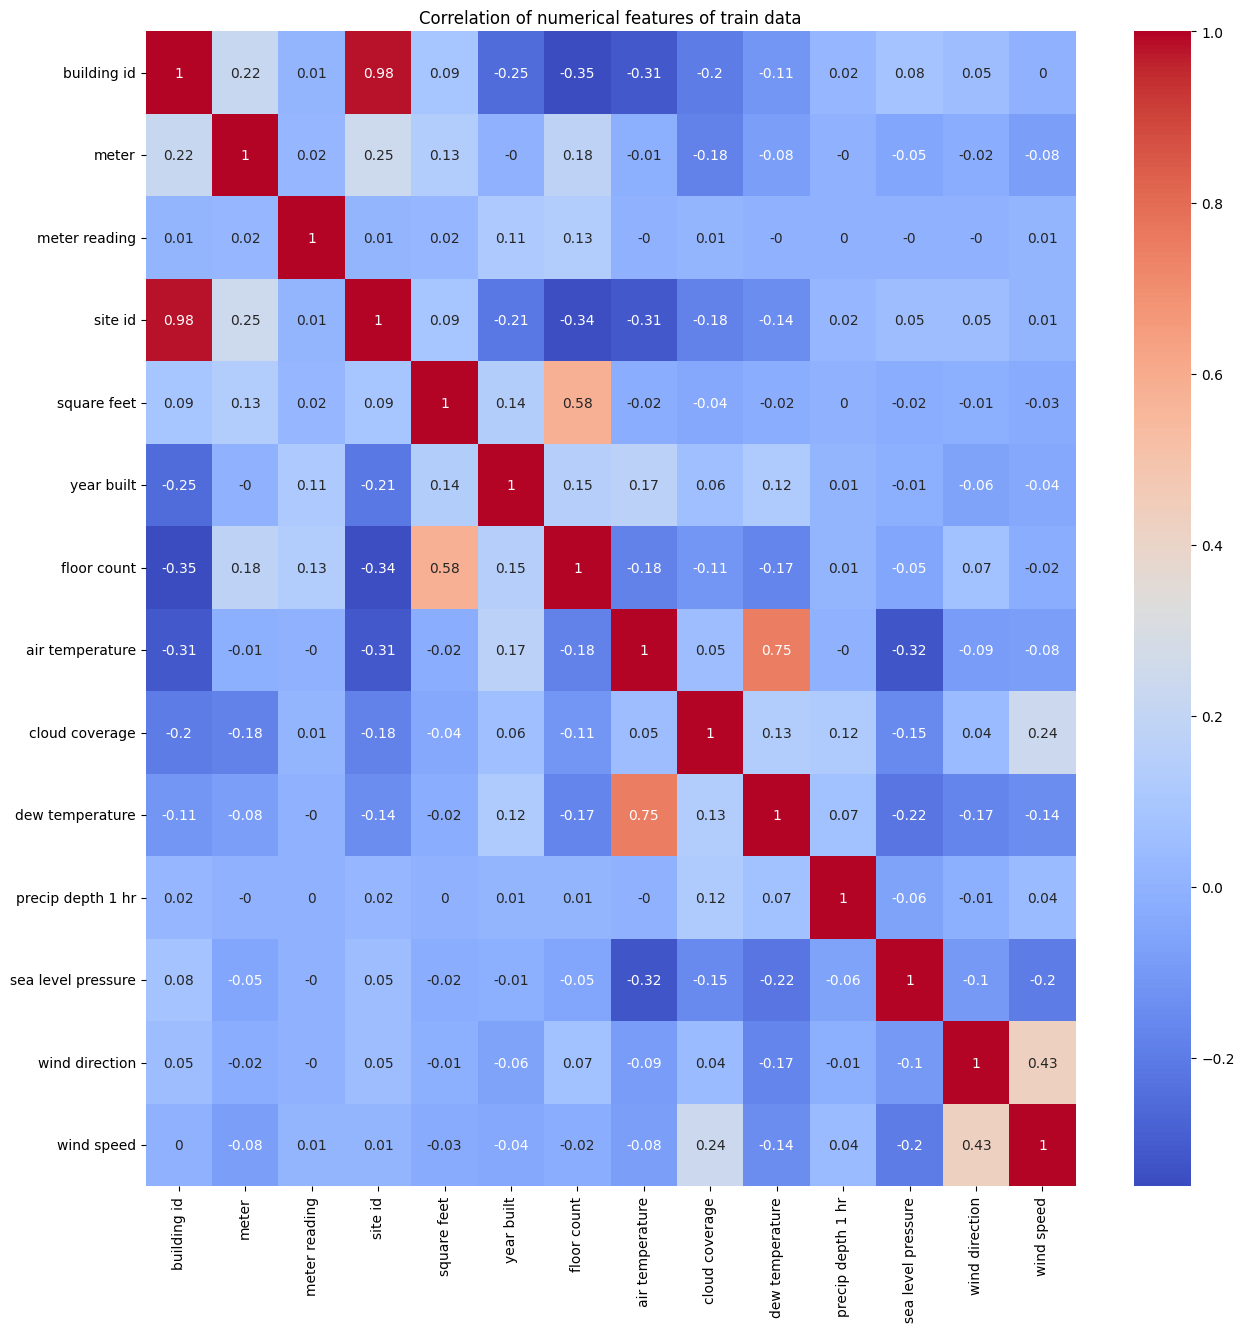

In [32]:
correlation=train_merge.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlation,annot=True,cmap='coolwarm')
ax.set_title('Correlation of numerical features of train data')
plt.show()

floor_count,square_feet, and year_built have the highest correlation values with the meter_reading

Check the null values 

In [33]:
null_train = train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train)

               NaN count
building id            0
meter                  0
timestamp              0
meter reading          0


In [34]:
del null_train
gc.collect()

19652

In [35]:
null_weather = weather_train_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_weather)

                    NaN count
site id                     0
timestamp                   0
air temperature            55
cloud coverage          69173
dew temperature           113
precip depth 1 hr       50289
sea level pressure      10618
wind direction           6268
wind speed                304


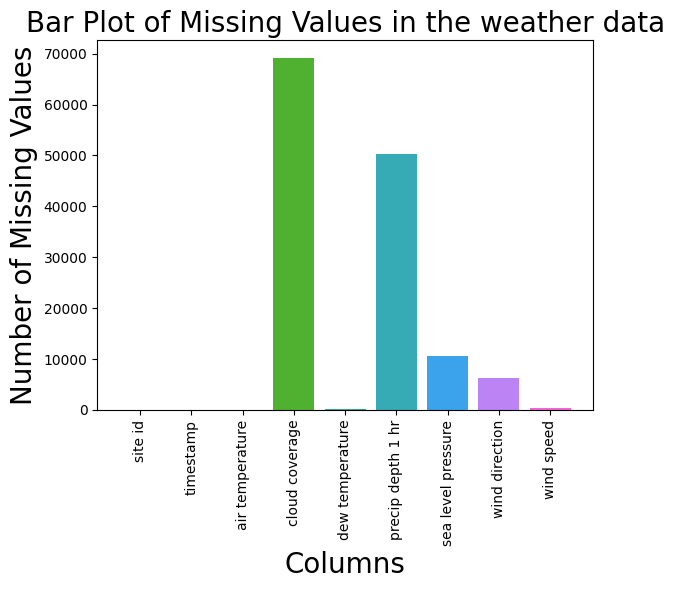

In [36]:
my_palette = sns.color_palette('husl', len(null_weather))
plt.bar(null_weather.index, null_weather['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the weather data',fontdict={'fontsize': 20})
plt.show()

In [37]:
del null_weather
gc.collect()

3596

In [38]:
null_building = building_meta_df.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_building)

             NaN count
site id              0
building id          0
primary use          0
square feet          0
year built         774
floor count       1094


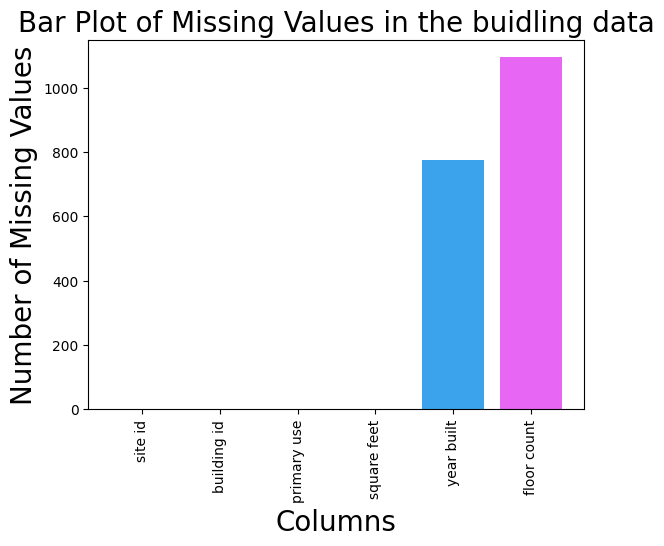

In [39]:
my_palette = sns.color_palette('husl', len(null_building))
plt.bar(null_building.index, null_building['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the buidling data',fontdict={'fontsize': 20})
plt.show()

In [40]:
del null_building
gc.collect()

2970

In [41]:
null_train_merge = train_merge.apply(lambda x: sum(x.isnull())).to_frame(name= 'NaN count')
print(null_train_merge)

                    NaN count
building id                 0
meter                       0
timestamp                   0
meter reading               0
site id                     0
primary use                 0
square feet                 0
year built           12127645
floor count          16709167
air temperature         96658
cloud coverage        8825365
dew temperature        100140
precip depth 1 hr     3749023
sea level pressure    1231669
wind direction        1449048
wind speed             143676


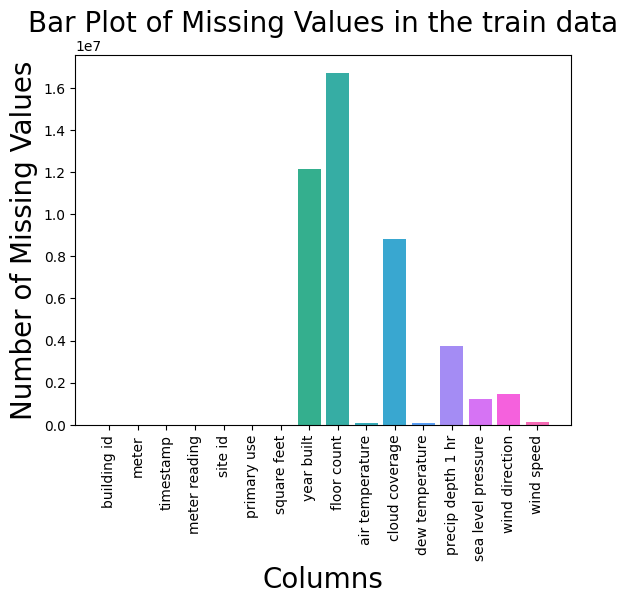

In [42]:
my_palette = sns.color_palette('husl', len(null_train_merge))
plt.bar(null_train_merge.index, null_train_merge['NaN count'], color=my_palette)
plt.xticks(rotation=90)
plt.xlabel('Columns',fontdict={'fontsize': 20})
plt.ylabel('Number of Missing Values',fontdict={'fontsize': 20})
plt.title('Bar Plot of Missing Values in the train data',fontdict={'fontsize': 20})
plt.show()

In [43]:
del null_train_merge
gc.collect()

4711

Visualize missing values (NaN) as a Matrix 

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


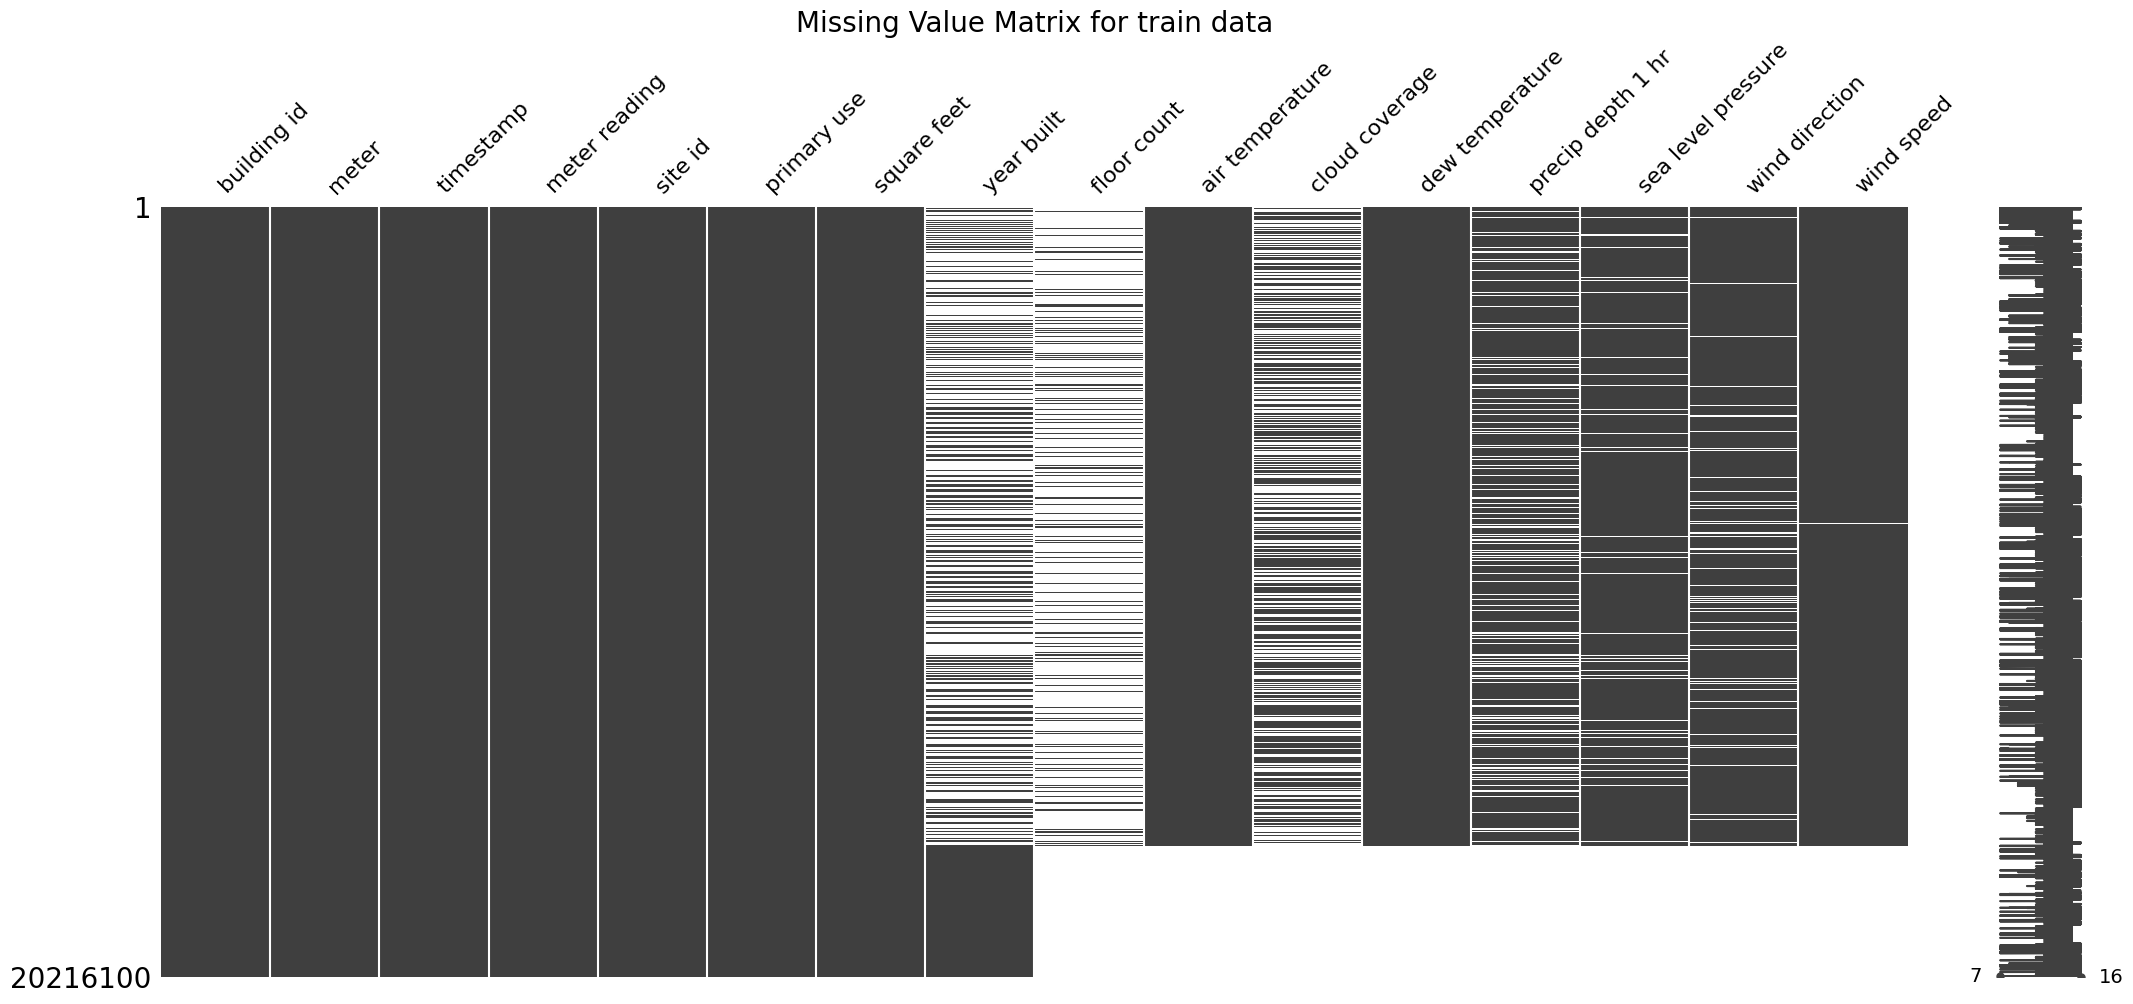

In [44]:
msno.matrix(train_merge)
plt.title("Missing Value Matrix for train data", fontdict={'fontsize': 20})
plt.show()

year_built, floor_count, and cloud coverage are columns having the most NaN values, which floor_count and year_built columns have more than 50% of missing values.

# Outliers 

In [45]:
def boxplot_func(dFrame, fea_list):
  f, ax = plt.subplots(1, len(fea_list), figsize=(25,10))
  for i in range(len(fea_list)):
    sns.boxplot(data = dFrame[fea_list[i]], ax = ax[i])
    ax[i].set_xlabel(fea_list[i])

In [46]:
def plot_boxplot(df, column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    avg_val = df[column_name].mean()
    std_val = df[column_name].std()
    # Create a list with the statistics values
    stats_values = [min_val, max_val, avg_val, std_val]
    # Create a list with the actual column values
    data_values = df[column_name].dropna()
    plt.boxplot(data_values)
    # Add horizontal lines for the statistics values
    plt.axhline(y=min_val, color='r', linestyle='-')
    plt.axhline(y=max_val, color='r', linestyle='-')
    plt.axhline(y=avg_val, color='g', linestyle='-')
    plt.axhline(y=avg_val-std_val, color='y', linestyle='--')
    plt.axhline(y=avg_val+std_val, color='y', linestyle='--')
    plt.xlabel(column_name, fontsize=10)
    plt.title(f'{column_name} in train data', fontsize=10)
    plt.ylabel('Values', fontsize=10)
    plt.show()

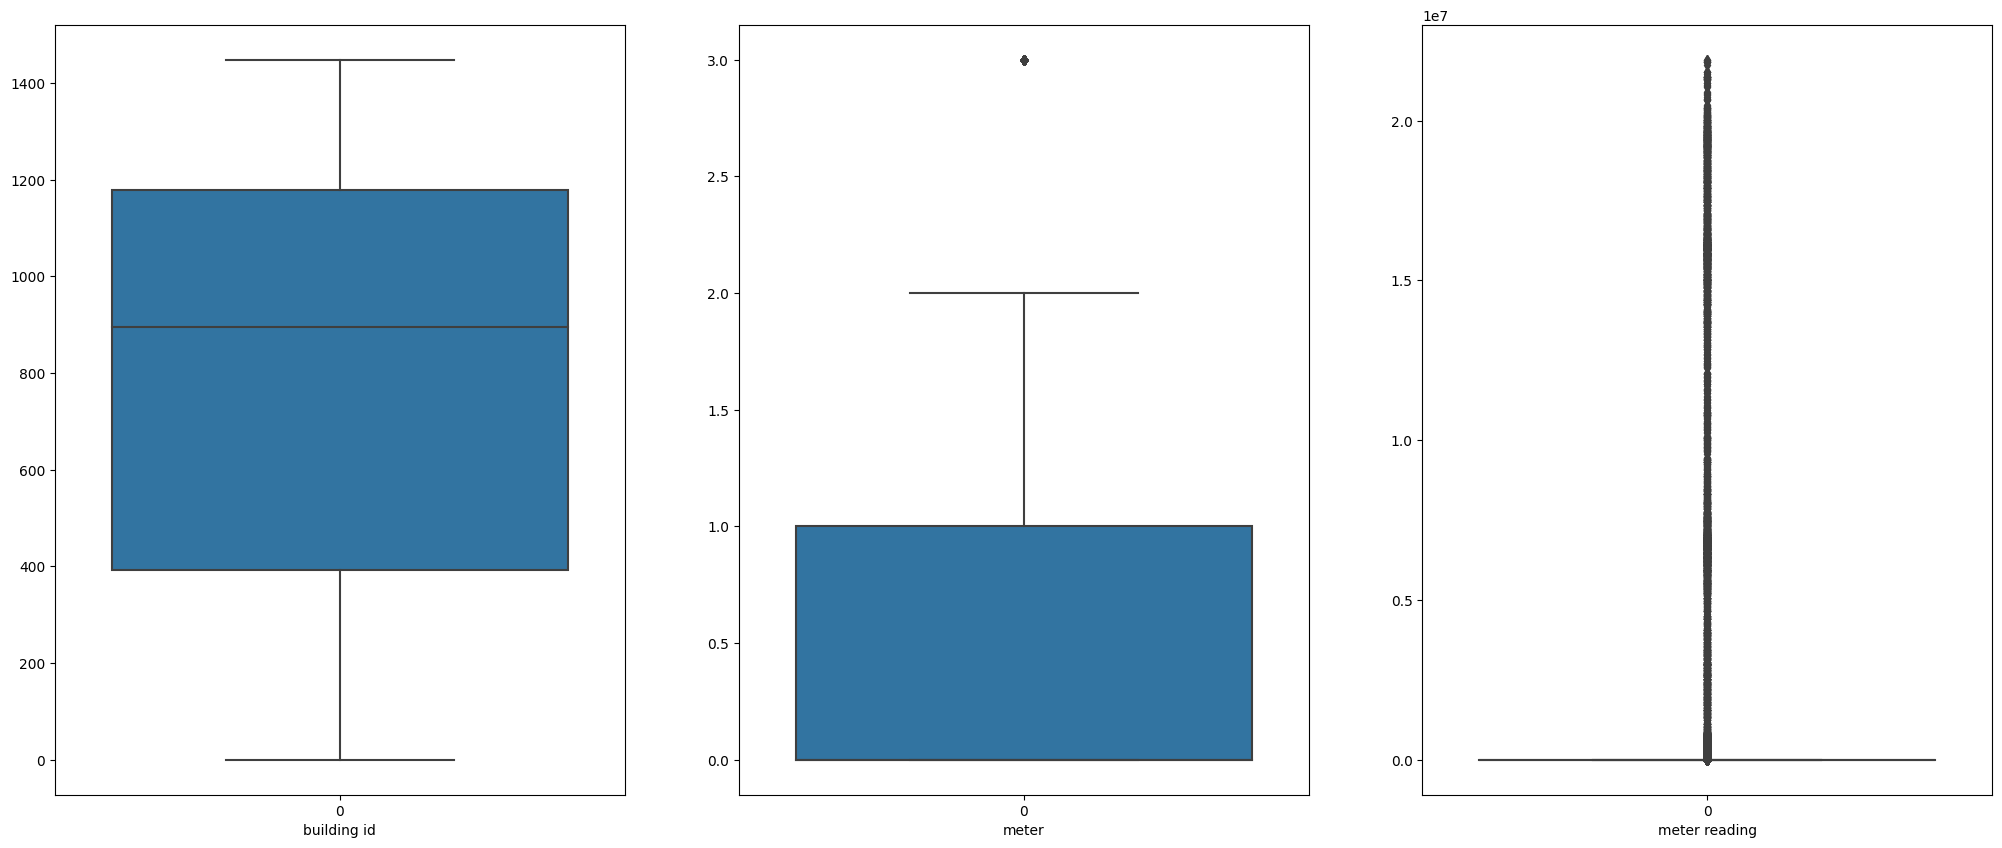

In [47]:
#outlier in train_df
boxplot_func(train_df,['building id', 'meter', 'meter reading'])
plt.show()

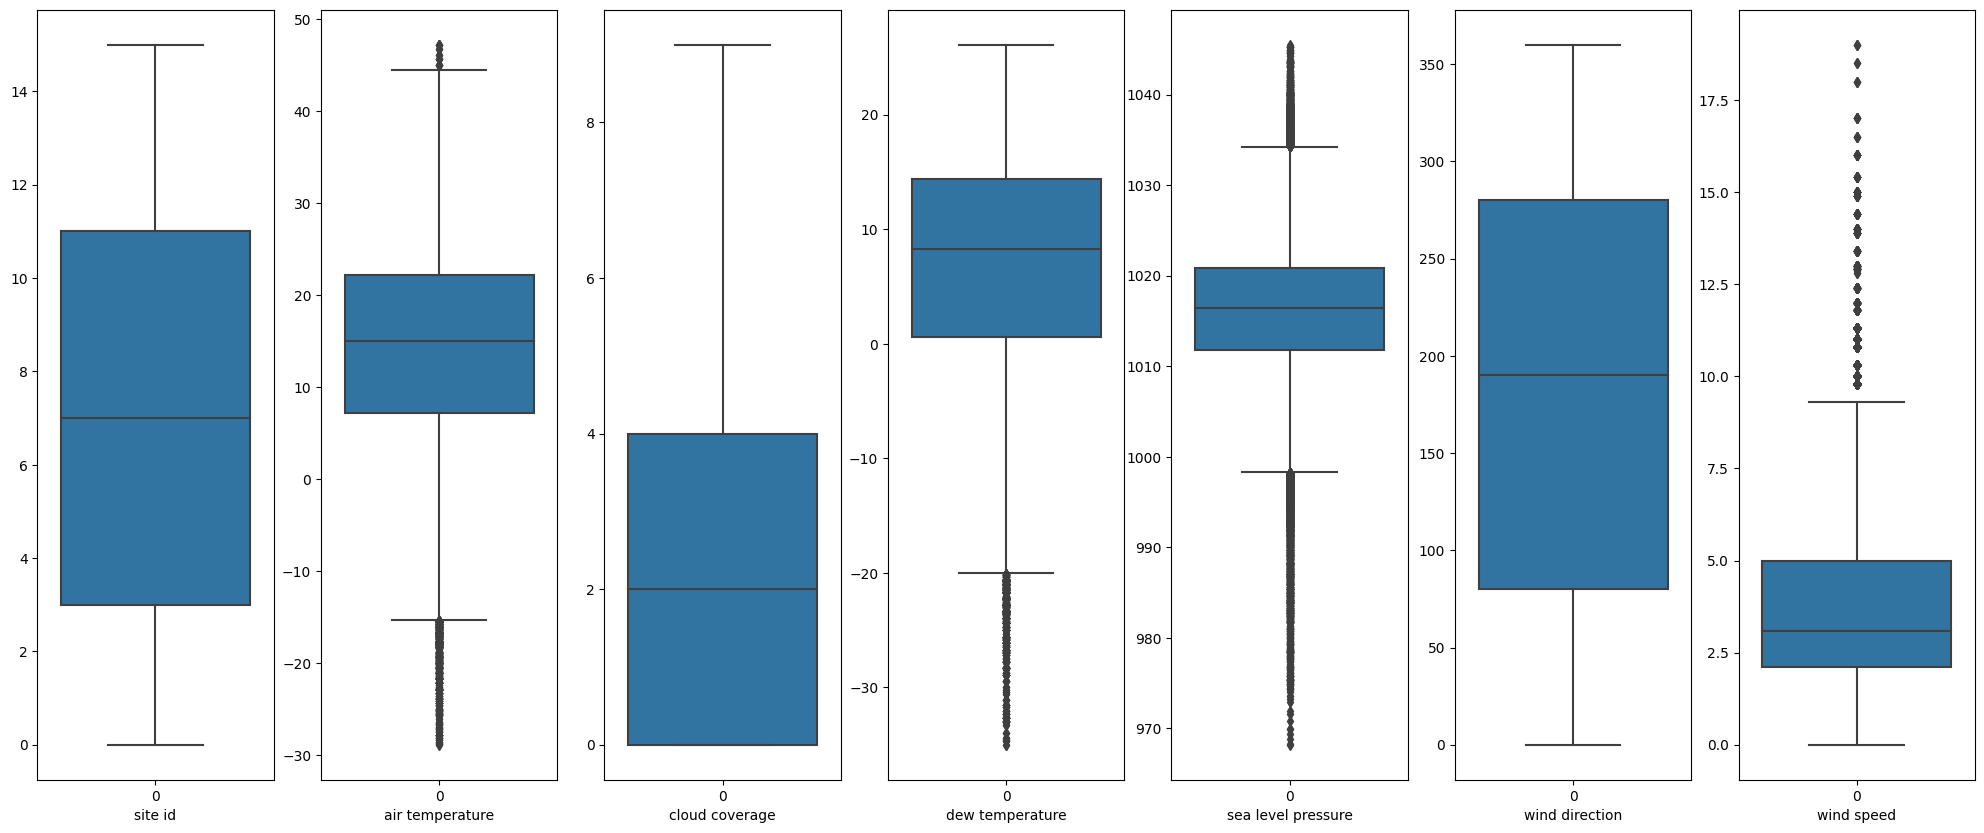

In [48]:
#outlier in weather_train_df
boxplot_func(weather_train_df,['site id', 'air temperature', 'cloud coverage',
       'dew temperature', 'sea level pressure',
       'wind direction', 'wind speed'])
plt.show()

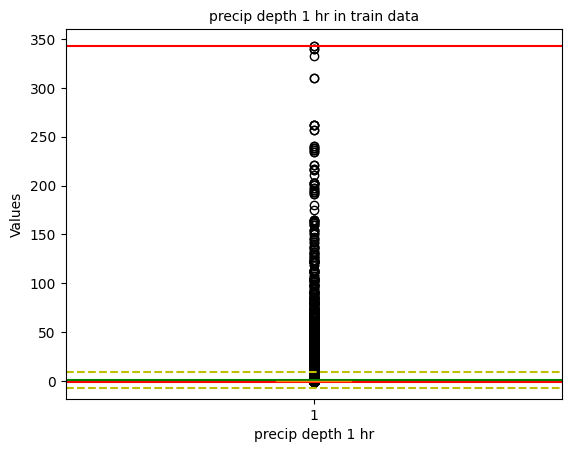

In [49]:
plot_boxplot(weather_train_df,'precip depth 1 hr')

In [50]:
weather_train_df['precip depth 1 hr'].describe()

count    89484.000000
mean         0.983047
std          8.463677
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        343.000000
Name: precip depth 1 hr, dtype: float64

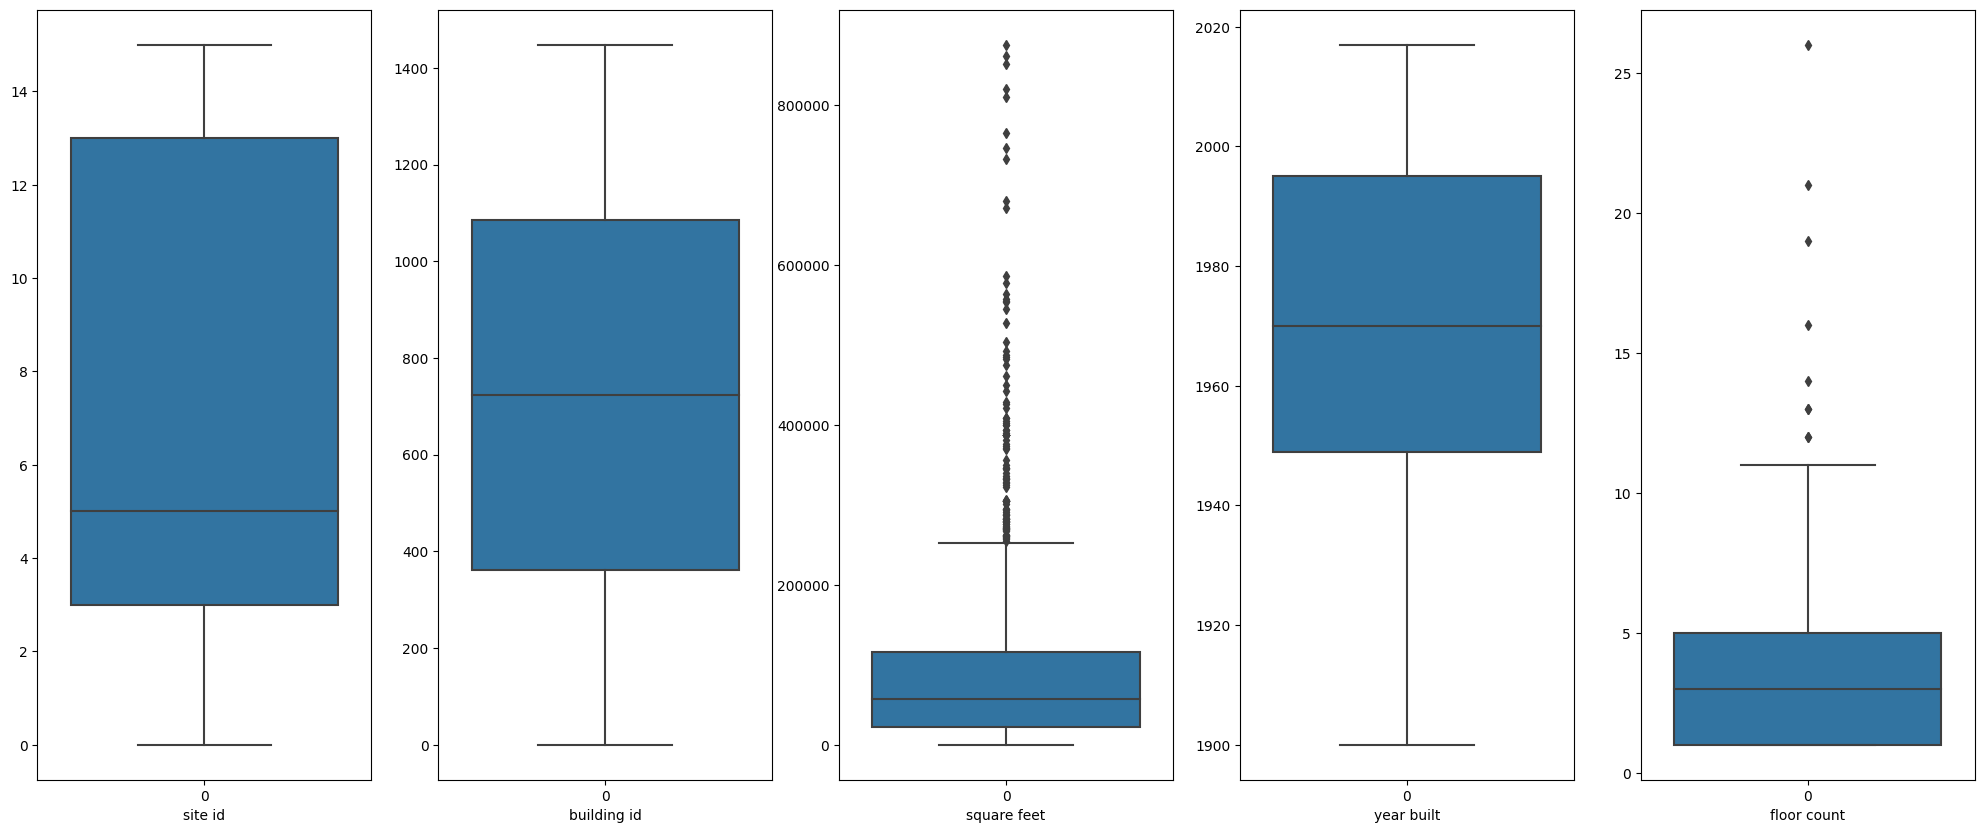

In [51]:
#outlier in building_meta_df
boxplot_func(building_meta_df,['site id', 'building id', 'square feet', 'year built',
       'floor count'])
plt.show()

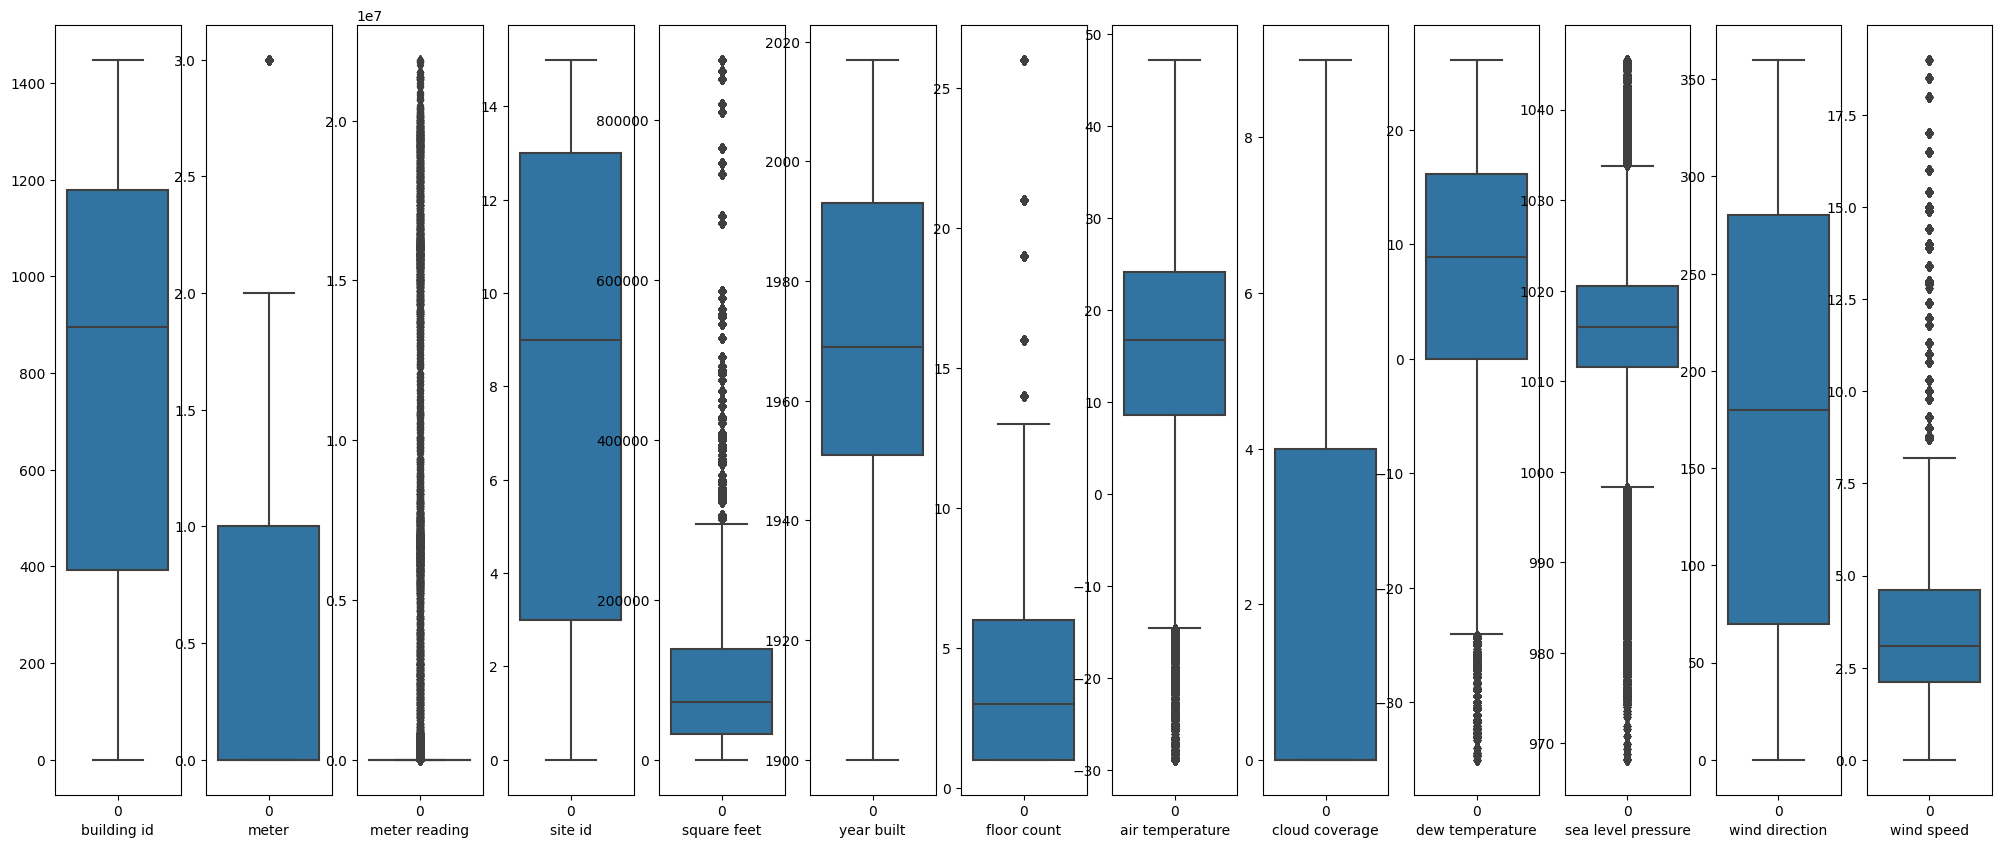

In [52]:
#outlier in train_merge
boxplot_func(train_merge,['building id', 'meter', 'meter reading', 'site id',
       'square feet', 'year built', 'floor count',
       'air temperature', 'cloud coverage', 'dew temperature',
       'sea level pressure', 'wind direction',
       'wind speed'])
plt.show()

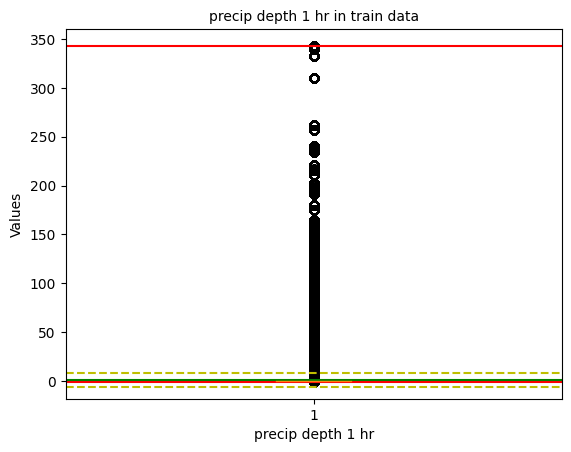

In [53]:
plot_boxplot(train_merge,'precip depth 1 hr')

In [54]:
train_merge['precip depth 1 hr'].describe()

count    1.646708e+07
mean     7.964156e-01
std      7.468997e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.430000e+02
Name: precip depth 1 hr, dtype: float64

Breaking Timestamp into Hour, Day, Month, Year
(firstly converts timestamp to date and then breaks down date into 6 new columns: hour, day, dayOfWeek, dayOfYear, month and year)

In [55]:
def breakdown_timestamp(dataframe):
    
    dataframe['timestamp']= pd.to_datetime(dataframe['timestamp'])

    dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
    
    dataframe['day']= np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']= np.uint8(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']= np.uint16(dataframe['timestamp'].dt.dayofyear)

    dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)

    dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe

In [56]:
train_merge = breakdown_timestamp(train_merge)

In [57]:
print('New Shape of train_merge Data:',train_merge.shape)

New Shape of train_merge Data: (20216100, 22)


Use log transformation to deal with outliers 

In [58]:
def plot_histogram(df, col_name):
    log_data = np.log(df[col_name])
    sns.histplot(log_data, kde=True)
    sns.set_style('whitegrid')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


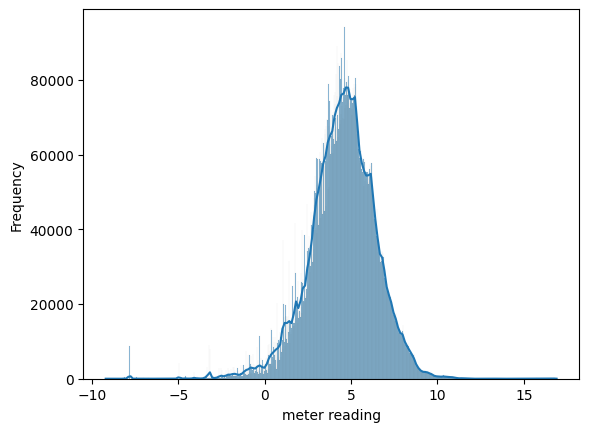

In [59]:
plot_histogram(train_df, 'meter reading')

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


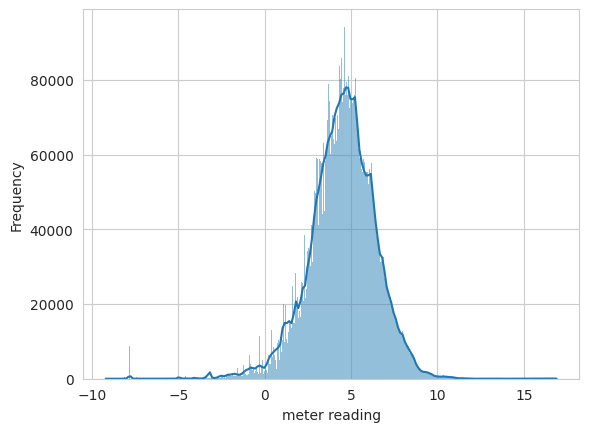

In [60]:
plot_histogram(train_merge, 'meter reading')

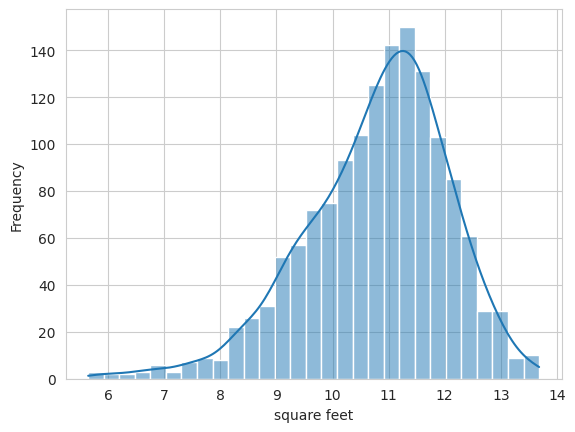

In [61]:
plot_histogram(building_meta_df, 'square feet')

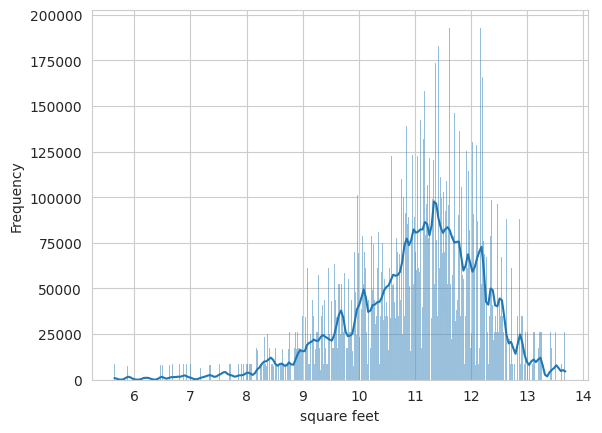

In [62]:
plot_histogram(train_merge, 'square feet')

In [63]:
train_df['meter reading'] = np.log1p(train_df['meter reading'])
train_merge['meter reading'] = np.log1p(train_merge['meter reading'])
building_meta_df['square feet'] = np.log1p(building_meta_df['square feet'])
train_merge['square feet'] = np.log1p(train_merge['square feet'])

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


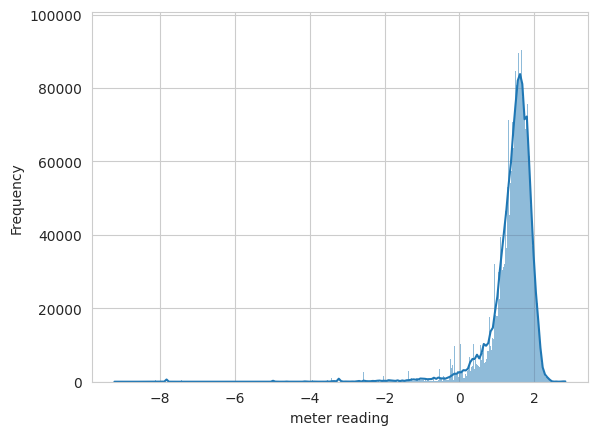

In [64]:
#After log_transformation
plot_histogram(train_df, 'meter reading')

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


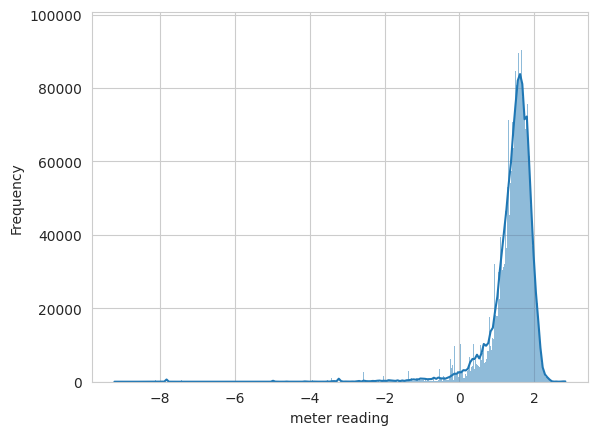

In [65]:
#After log_transformation
plot_histogram(train_merge, 'meter reading')

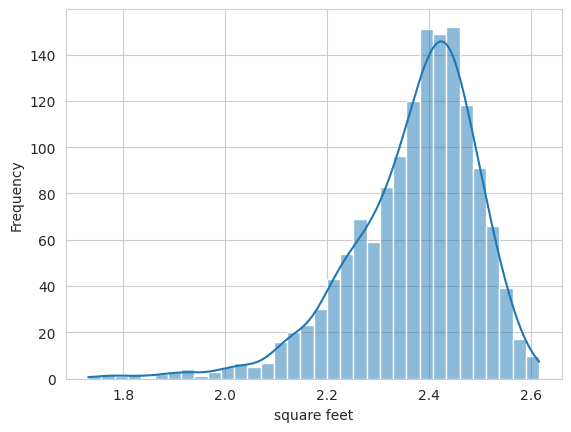

In [66]:
#After log_transformation
plot_histogram(building_meta_df, 'square feet')

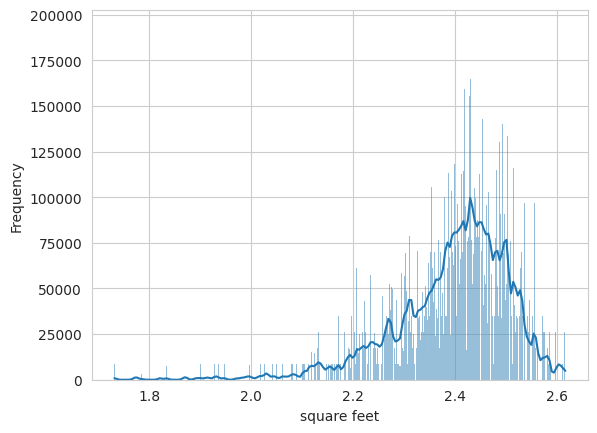

In [67]:
#After log_transformation
plot_histogram(train_merge, 'square feet')

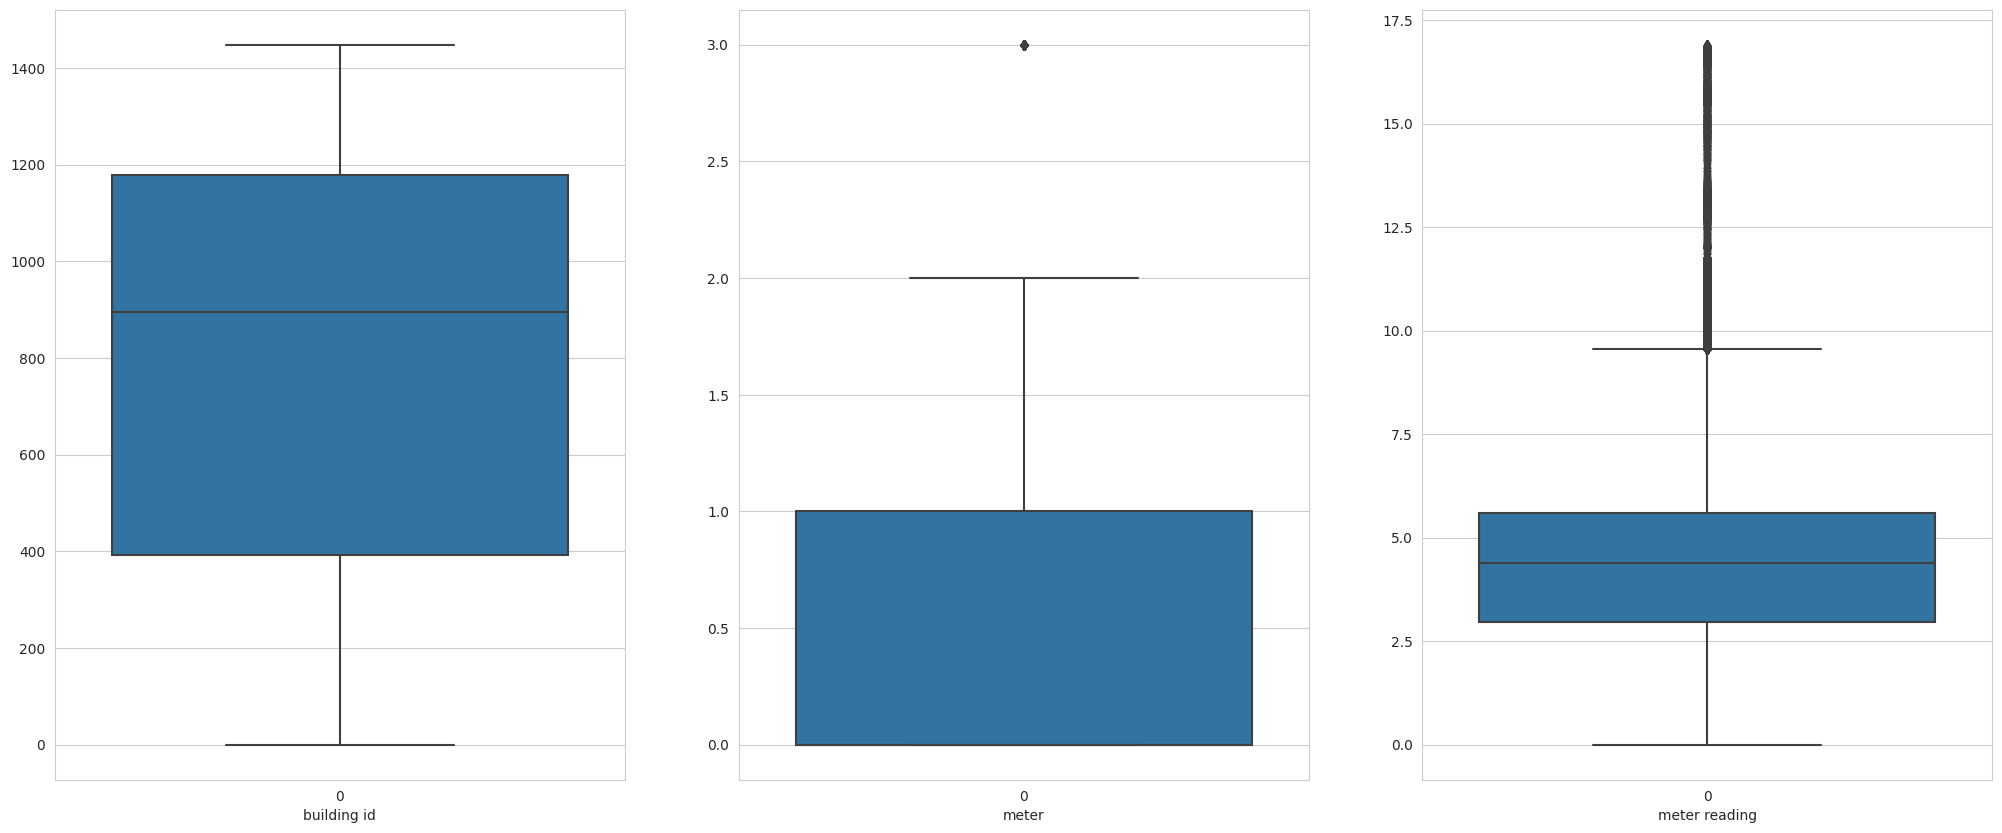

In [68]:
boxplot_func(train_df,['building id', 'meter', 'meter reading'])
plt.show()

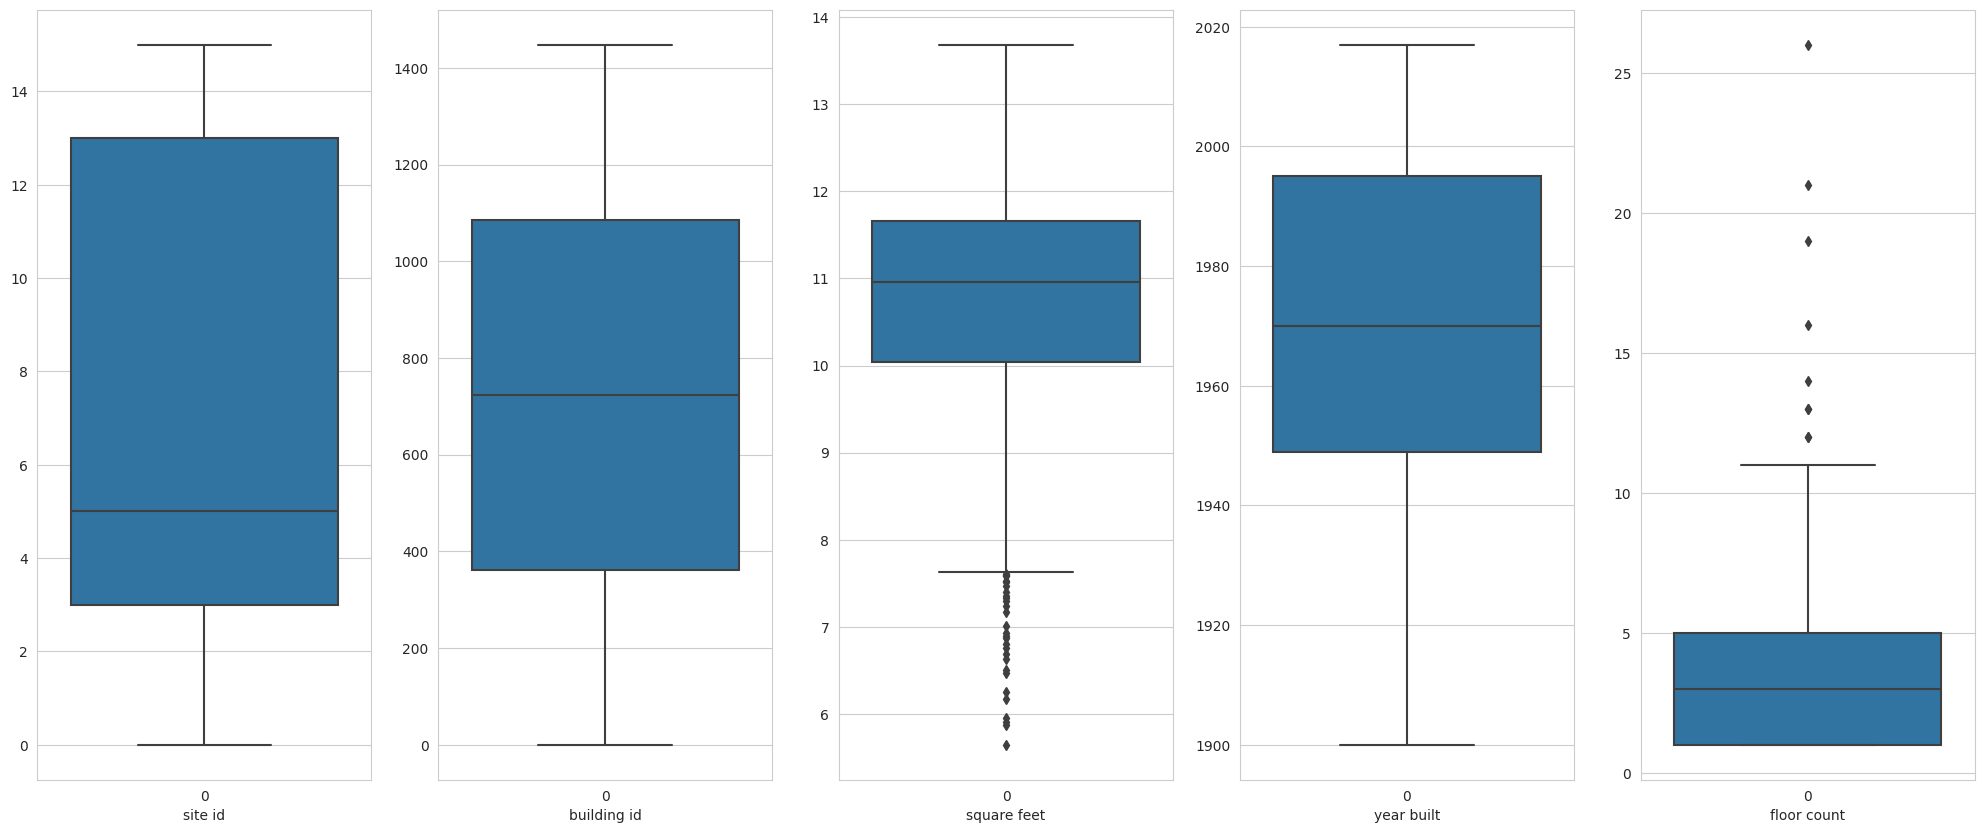

In [69]:
boxplot_func(building_meta_df,['site id', 'building id', 'square feet', 'year built',
       'floor count'])
plt.show()

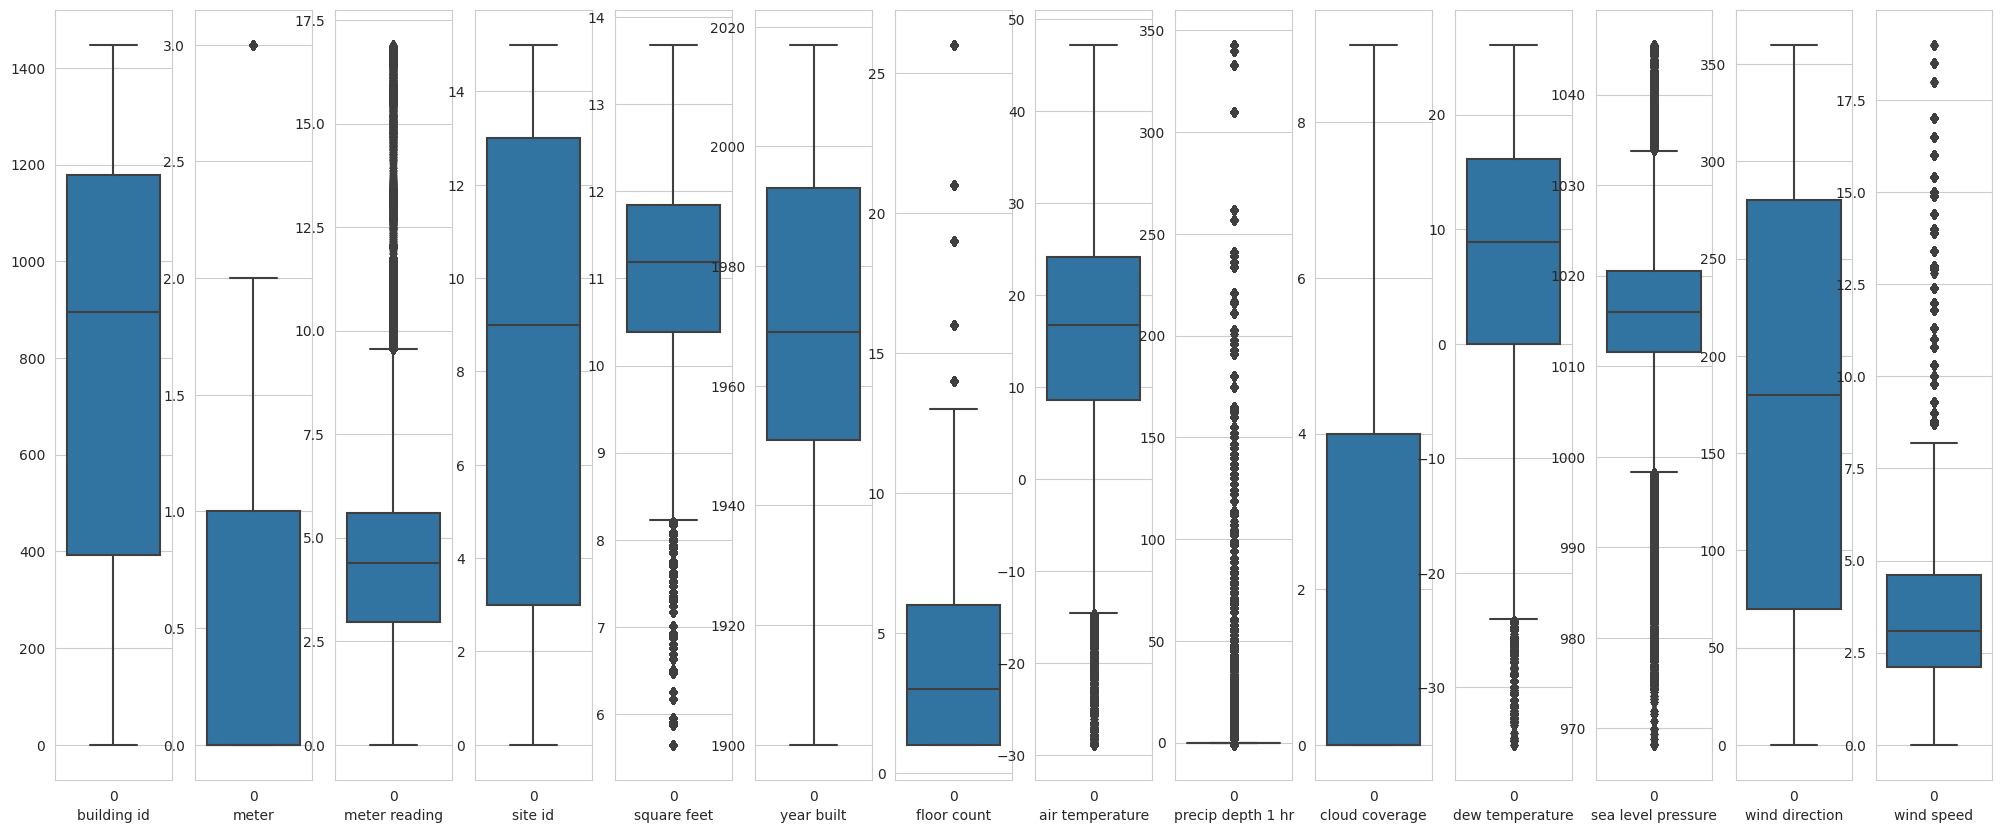

In [70]:
boxplot_func(train_merge,['building id', 'meter', 'meter reading', 'site id',
       'square feet', 'year built', 'floor count',
       'air temperature','precip depth 1 hr', 'cloud coverage', 'dew temperature',
       'sea level pressure', 'wind direction',
       'wind speed'])
plt.show()

In [71]:
print('---Summary after log transformation---')
train_df["meter reading"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     4.145761e+00
std      2.146220e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter reading, dtype: float64

In [72]:
print('---Summary after log transformation---')
train_merge["meter reading"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     4.145761e+00
std      2.146220e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter reading, dtype: float64

In [73]:
print('---Summary after log transformation---')
building_meta_df["square feet"].describe()

---Summary after log transformation---


count    1449.000000
mean       10.789761
std         1.274648
min         5.648974
25%        10.043815
50%        10.962562
75%        11.658557
max        13.681980
Name: square feet, dtype: float64

In [74]:
print('---Summary after log transformation---')
train_merge["square feet"].describe()

---Summary after log transformation---


count    2.021610e+07
mean     1.103946e+01
std      1.180439e+00
min      5.648974e+00
25%      1.038986e+01
50%      1.119423e+01
75%      1.184305e+01
max      1.368198e+01
Name: square feet, dtype: float64

Boxplot Without outliers 

In [77]:
def plot_boxplots(df):
    # Get list of numeric columns
    numeric_cols = list(df.select_dtypes(include='number').columns)
    # Calculate number of subplots
    num_plots = len(numeric_cols)
    num_rows = num_plots // 3 + 1 if num_plots % 3 != 0 else num_plots // 3
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
    axes = axes.flatten()
    # Loop through numeric columns and plot boxplots
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=col, data=df, ax=axes[i], showfliers=False)
        axes[i].set_xlabel(col, fontsize=18)
    # Remove unused subplots
    for j in range(num_plots, num_rows*3):
        fig.delaxes(axes[j])
    fig.suptitle("Boxplots without outliers",fontsize=25)
    plt.show()

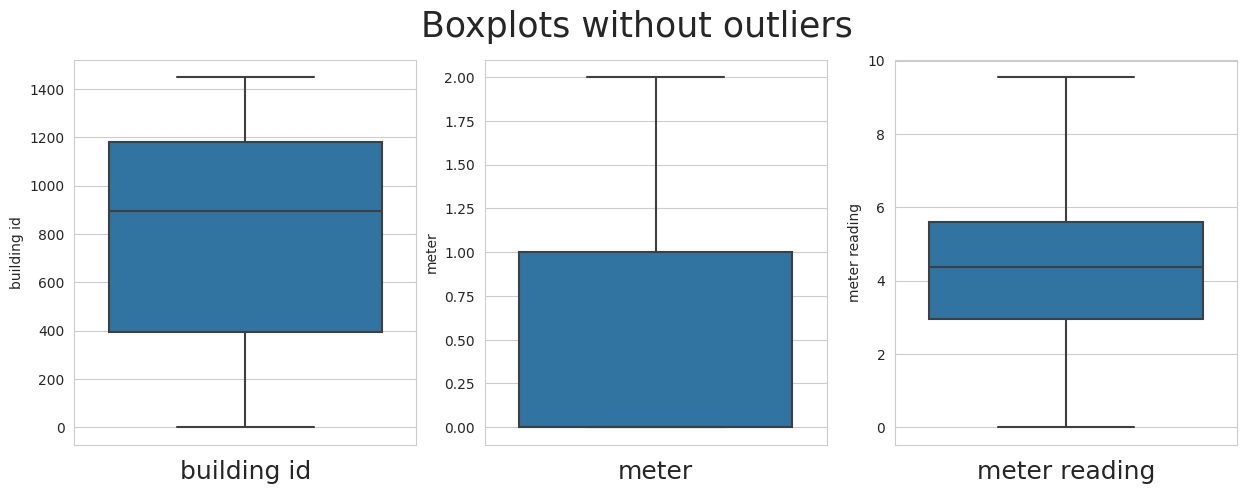

In [76]:
plot_boxplots(train_df)

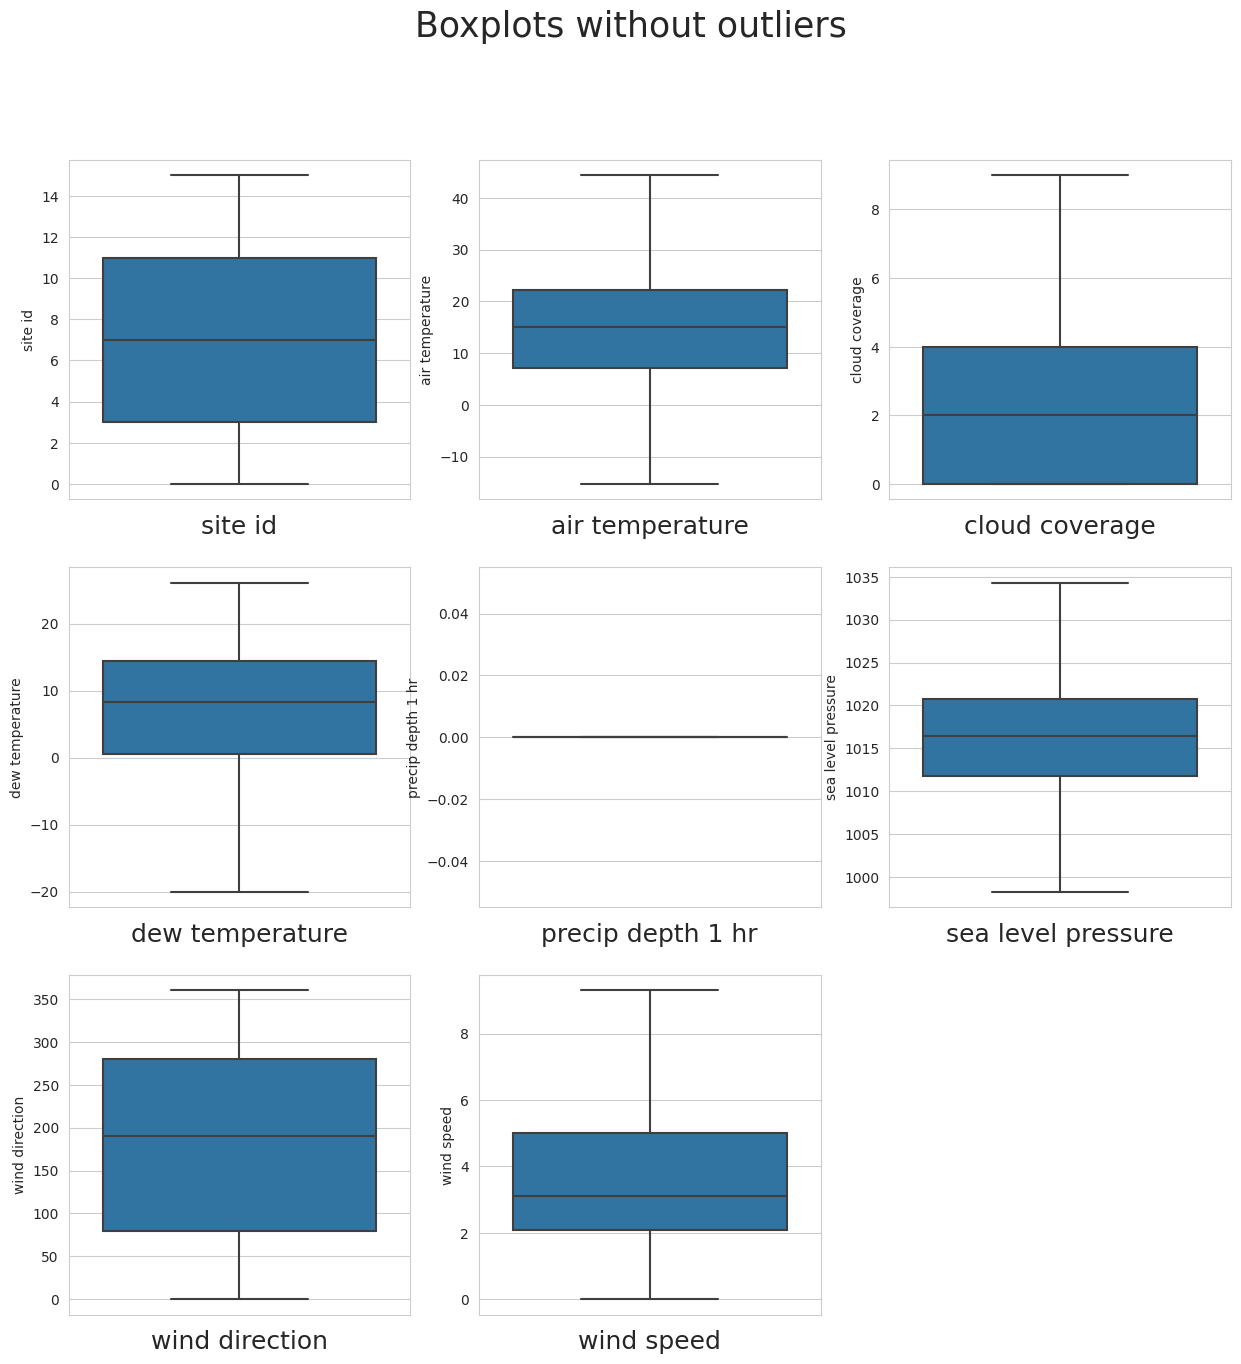

In [78]:
plot_boxplots(weather_train_df)

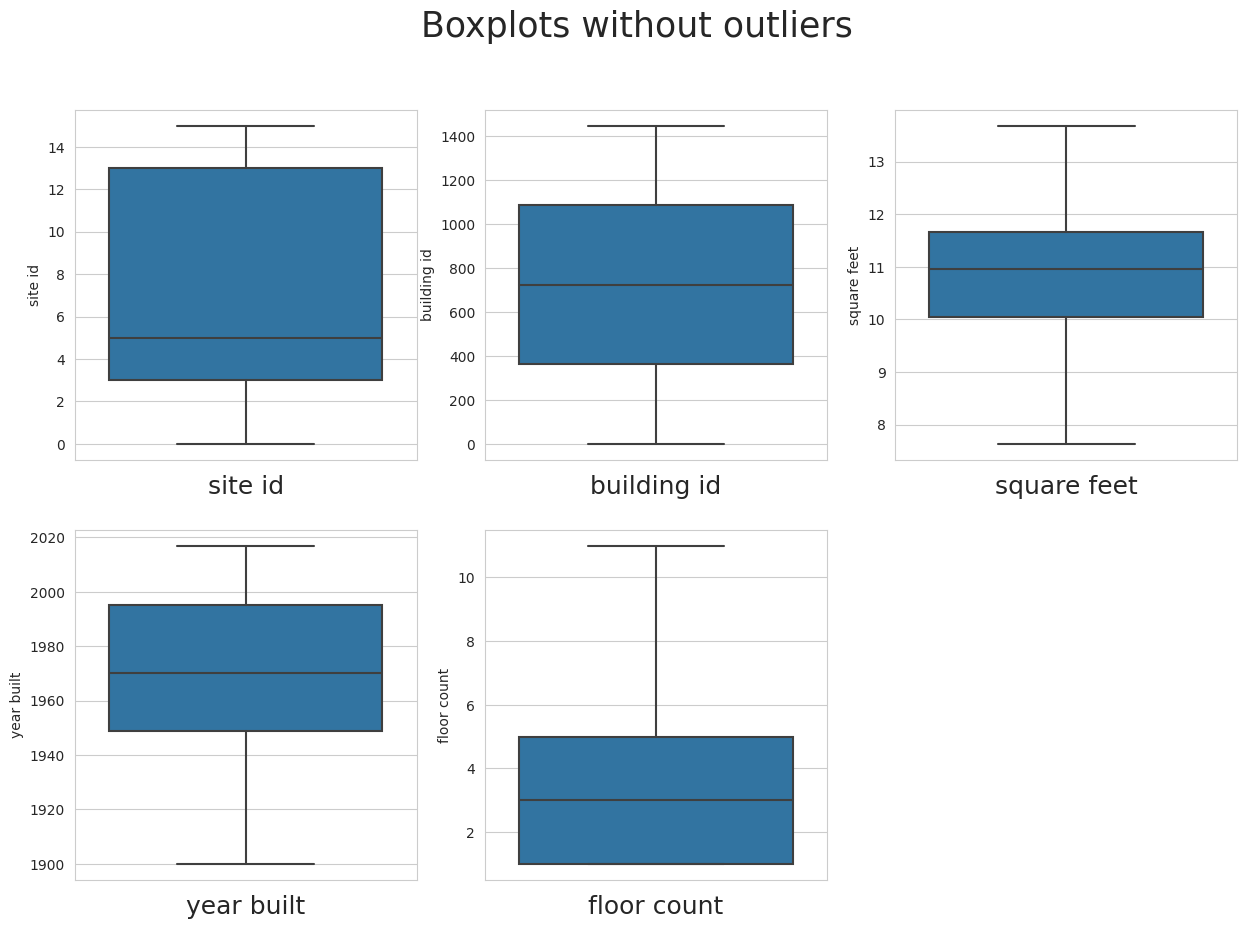

In [79]:
plot_boxplots(building_meta_df)

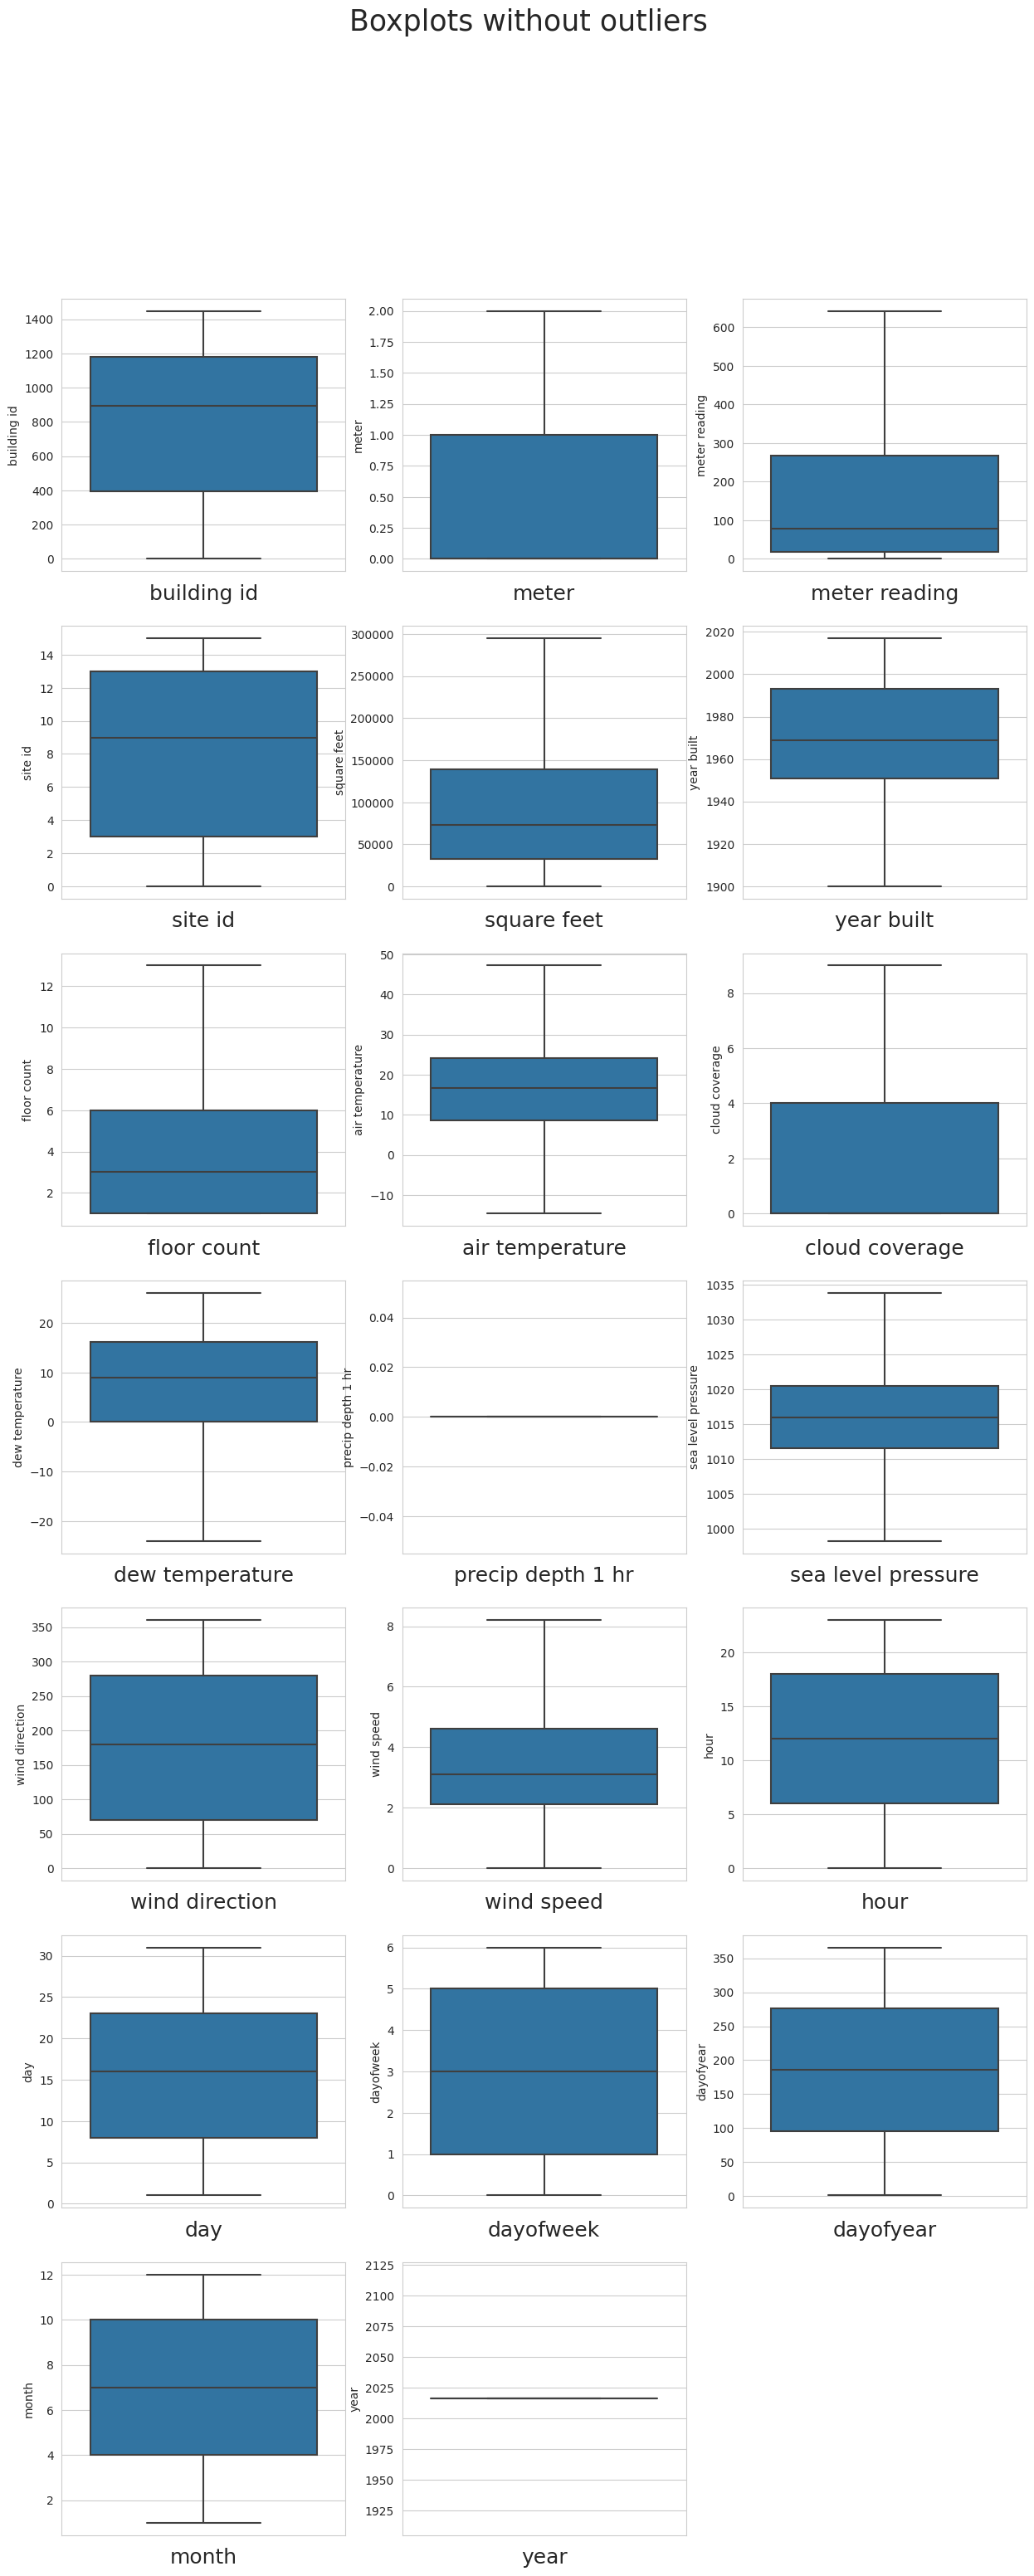

In [ ]:
plot_boxplots(train_merge)

# Analysis of train data 

meter

Text(0.5, 1.0, 'Count values per meter ')

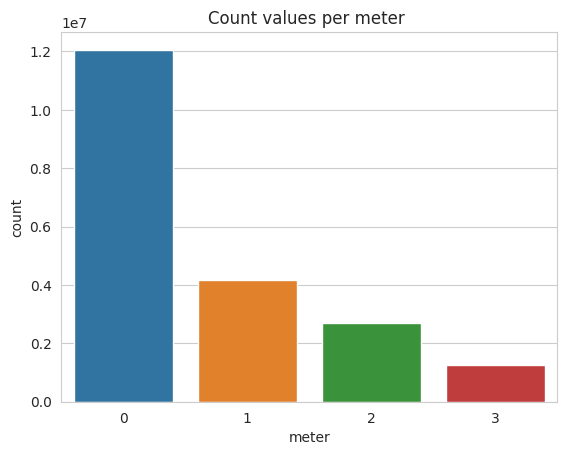

In [80]:
sns.countplot(x="meter", data=train_merge)
plt.title('Count values per meter ')

There is only few data on meter 3.
{0: electricity, 1: chilledwater, 2: steam, 3: hotwater}

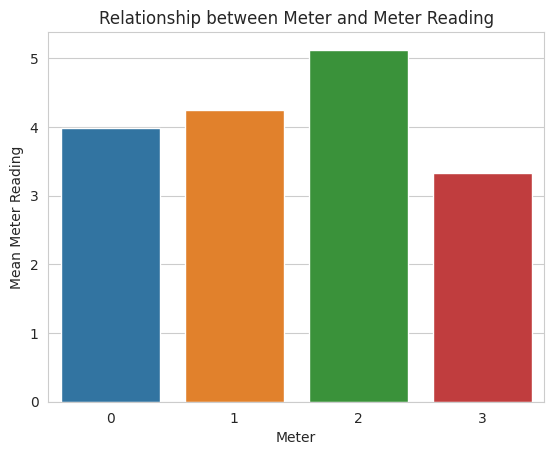

In [81]:
grouped_data = train_merge.groupby('meter')['meter reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('Meter')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between Meter and Meter Reading')
plt.show()

- Meter 0 has the large amount of data, 
- Meter 2 has the huge difference in terms of min and max.

In [110]:
def plot_grouped_data(df, groupby_col, groupby_values, agg_col, agg_func, n_rows, n_cols, fig_size):
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=fig_size)
    axes = axes.flatten()
    # Iterate over the groupby values
    for i, ax in zip(groupby_values, axes):
        # Group the data and calculate the mean for each timestamp
        grouped_df = df[df[groupby_col] == i].groupby('timestamp').agg({agg_col: agg_func}).reset_index()
        # Plot the hourly mean
        sns.lineplot(data=grouped_df, y=agg_col, x='timestamp', ax=ax, label='hour')
        # Plot the daily mean
        sns.lineplot(data=grouped_df.resample('D', on='timestamp').mean().reset_index(), y=agg_col, x='timestamp', ax=ax, label='day')
        # Set the title
        ax.set_title(f"{groupby_col} {i}")
    plt.tight_layout()
    plt.show()

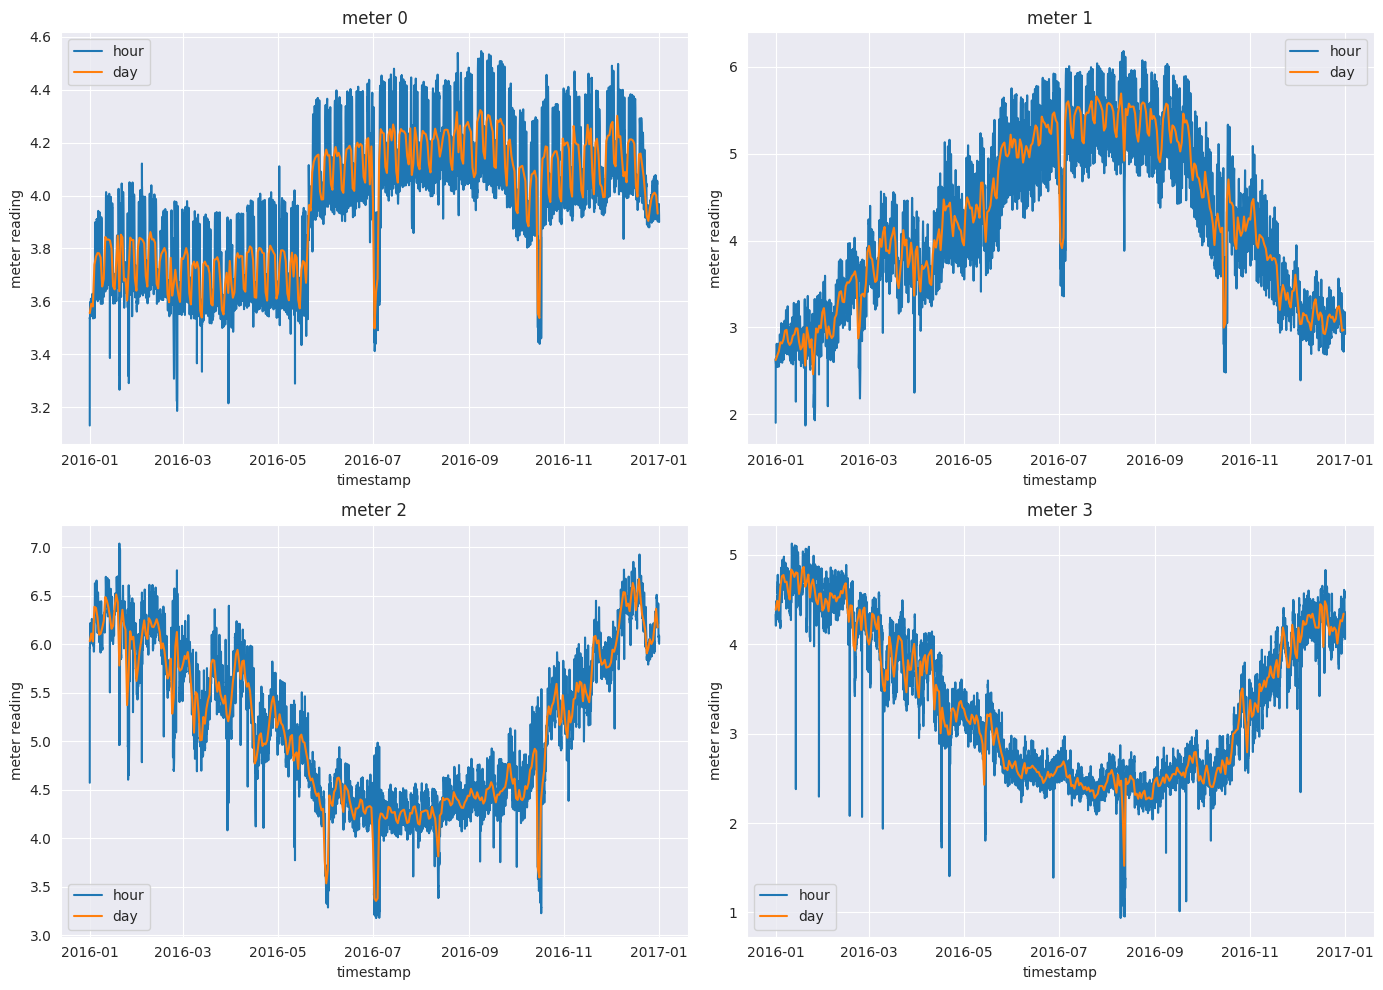

In [111]:
plot_grouped_data(train_merge, 'meter', range(4), 'meter reading', 'mean', 2, 2, (14, 10))

Site_id 

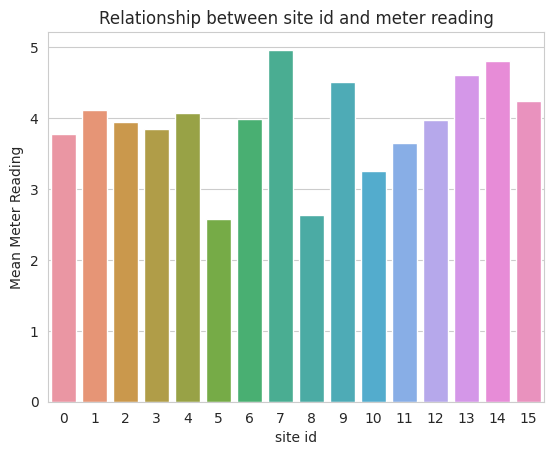

In [84]:
grouped_data = train_merge.groupby('site id')['meter reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('site id')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between site id and meter reading')
plt.show()

In [85]:
del grouped_data
gc.collect()

18373

In [86]:
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'}

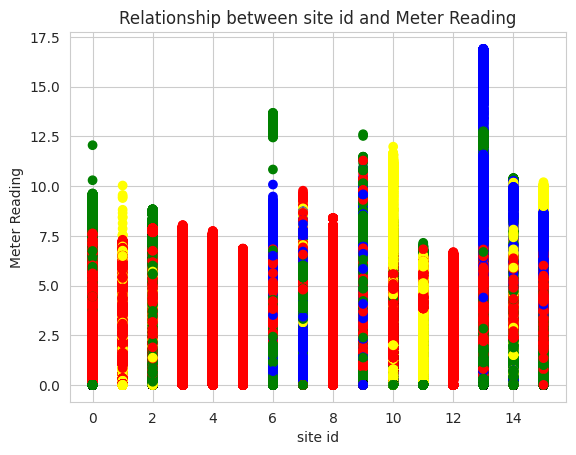

In [87]:
fig, ax = plt.subplots()
ax.scatter(train_merge['site id'], train_merge['meter reading'], c=train_merge['meter'].apply(lambda x: colors[x]))
ax.set_title('Relationship between site id and Meter Reading')
ax.set_xlabel('site id')
ax.set_ylabel('Meter Reading')
plt.show()

- site_id 7 has the highest mean of meter_reading, 
- there are many meter 2 data in site_id 13, which has the large values of meter_reading

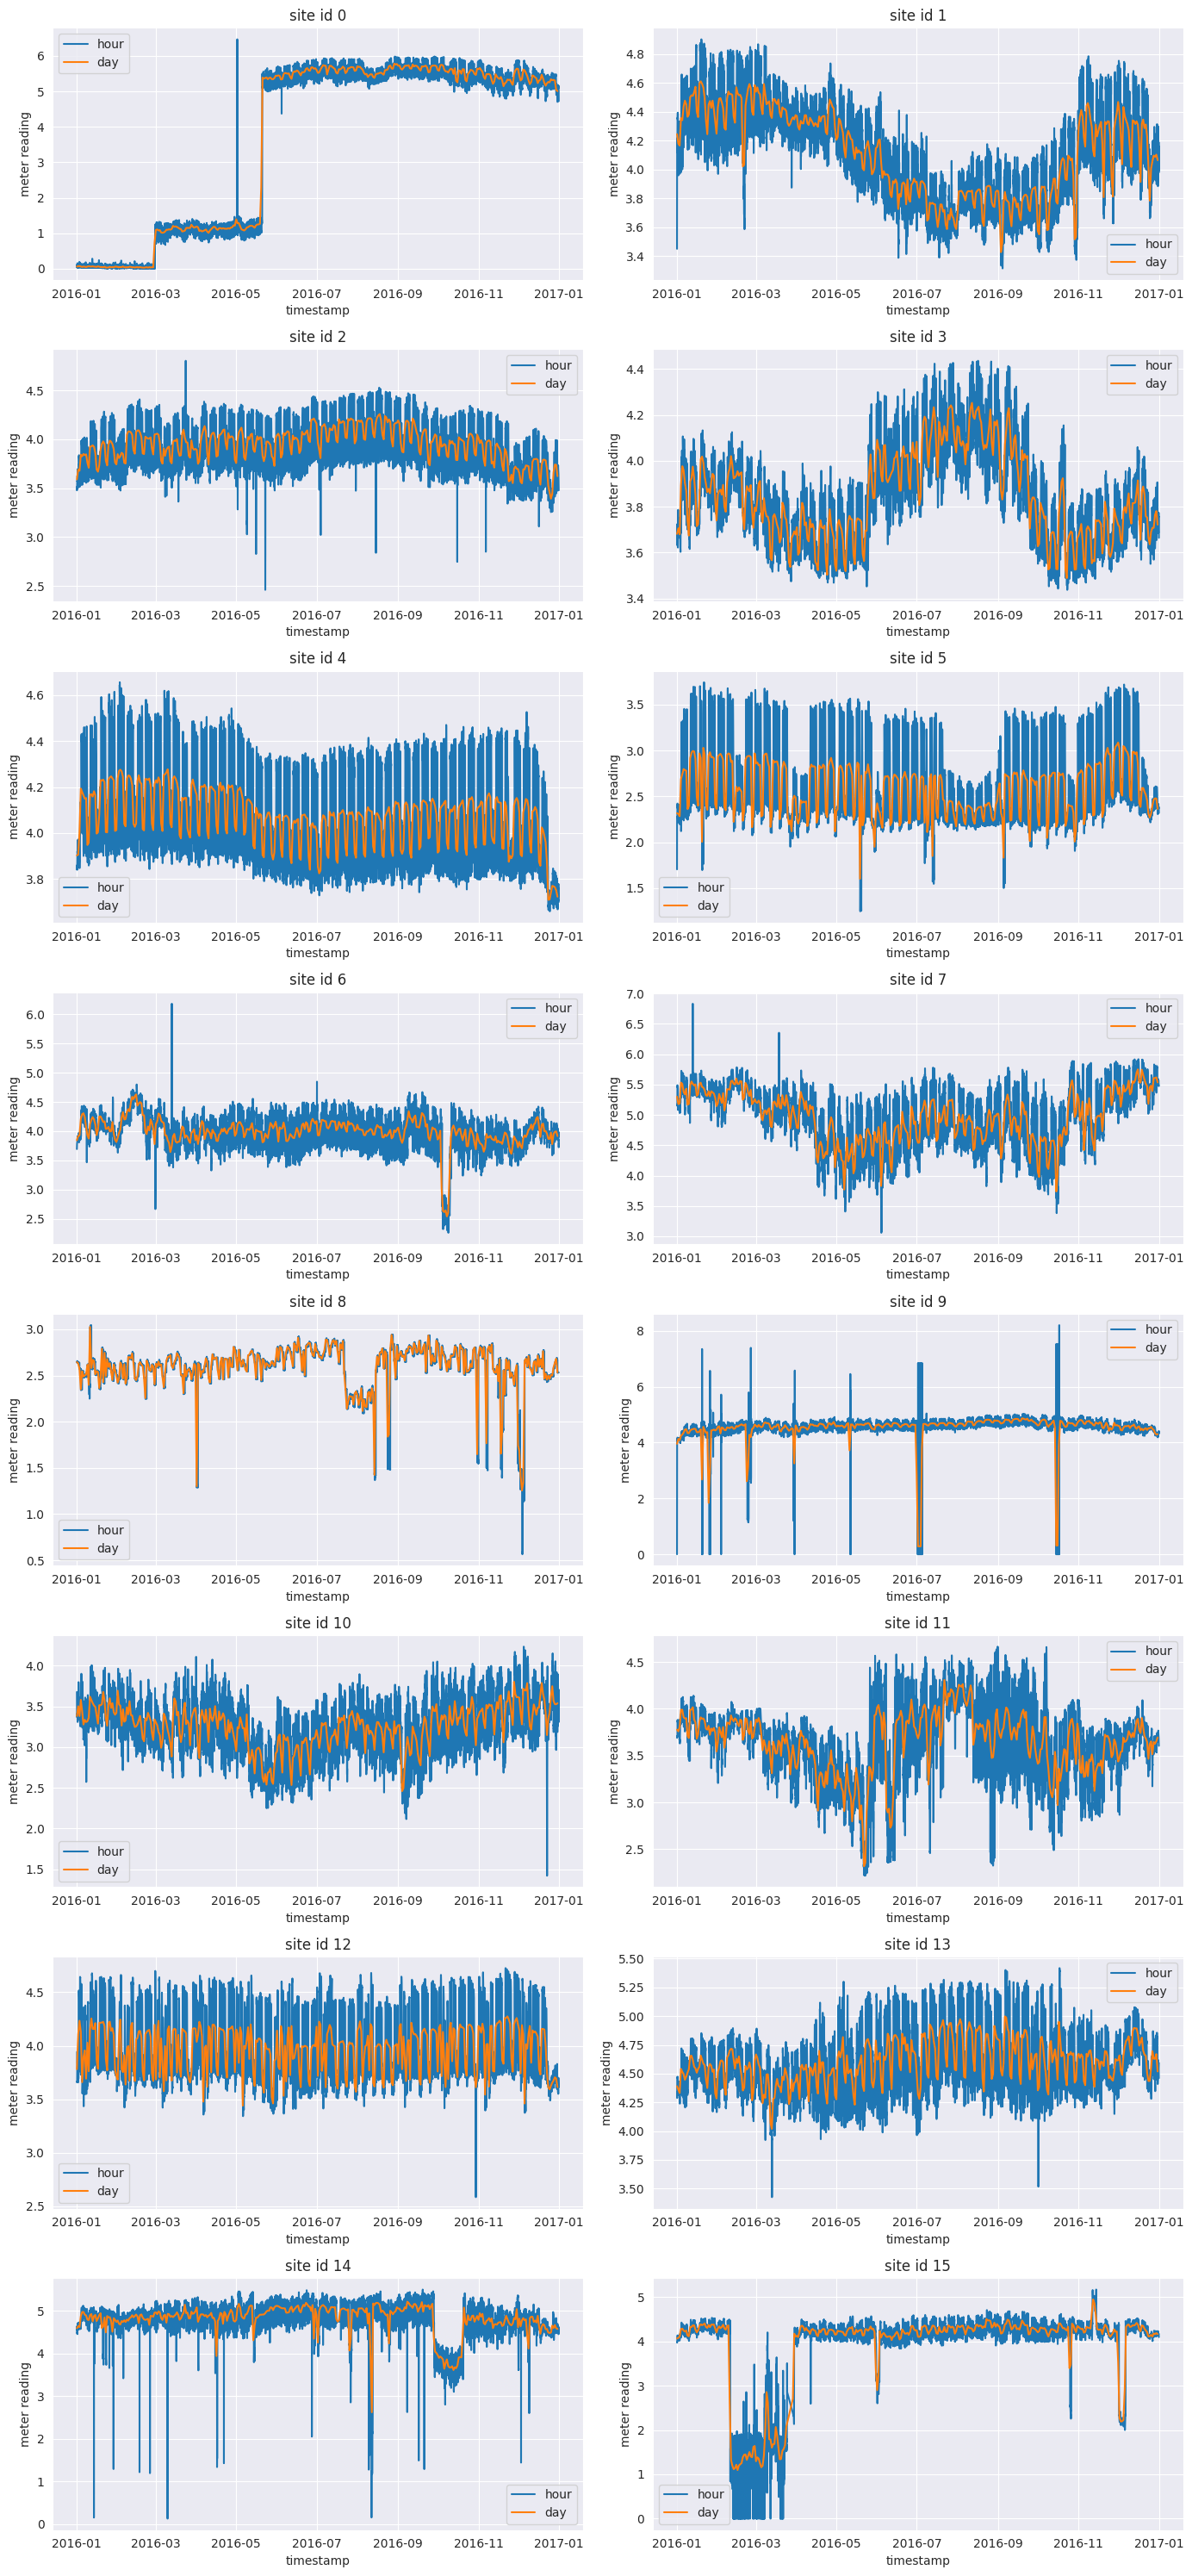

In [112]:
plot_grouped_data(train_merge, 'site id', range(16), 'meter reading', 'mean', 8, 2, (14, 30))

primary_use

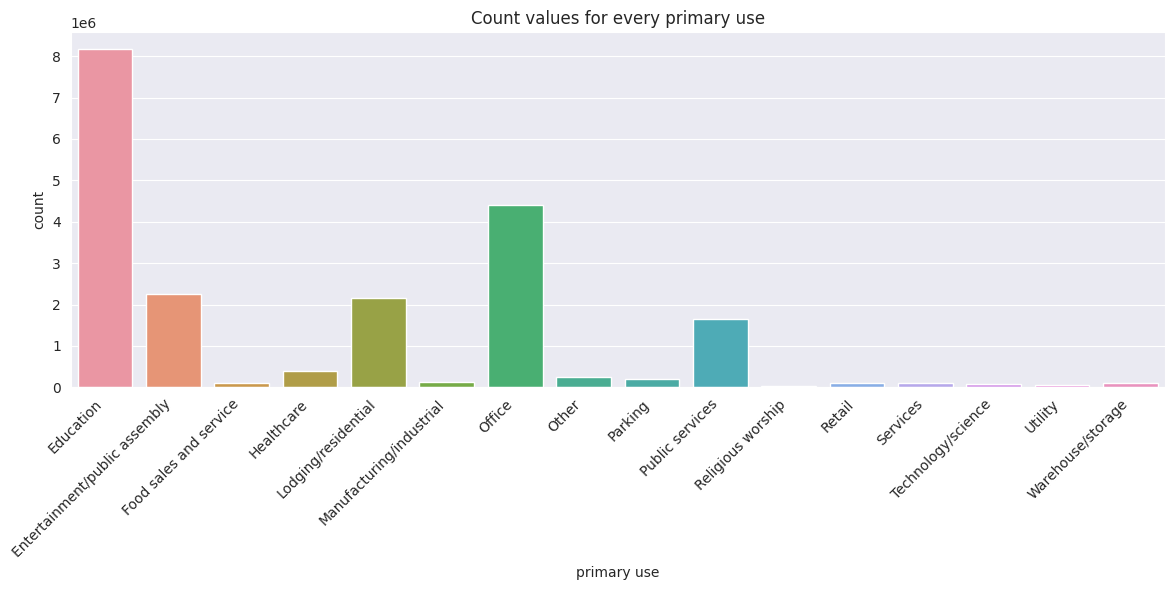

In [90]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="primary use", data=train_merge)
plt.title('Count values for every primary use')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

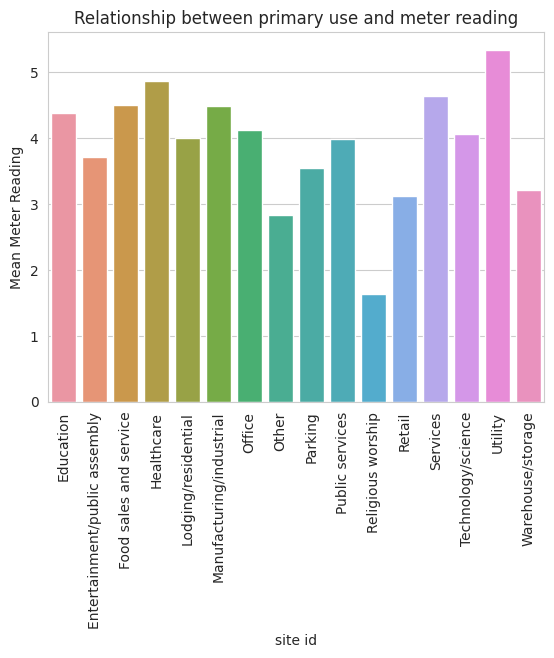

In [88]:
grouped_data = train_merge.groupby('primary use')['meter reading'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('site id')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between primary use and meter reading')
plt.xticks(rotation=90)
plt.show()

-there is large amount of education building in primary_use

In [91]:
# Print the categories of the column primary_use before encoding in list format

print(train_merge['primary use'].unique().tolist())


['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', 'Retail', 'Parking', 'Public services', 'Warehouse/storage', 'Food sales and service', 'Religious worship', 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']


In [92]:
use_to_num={
    'Education':0,
    'Entertainment/public assembly':1,
    'Food sales and service':2,
    'Healthcare':3,
    'Lodging/residential':4,
    'Manufacturing/industrial':5,
    'Office':6,
    'Other':7,
    'Parking':8,
    "Public services":9,
    'Religious worship':10,
    'Retail':11,
    'Services':12,
    'Technology/science':13,
    'Utility':14,
    'Warehouse/storage':15
}

In [93]:
if train_merge['primary use'].dtype.name == 'category': 
    # Map the categories to integers using the dictionary and the map() method
    train_merge['primary use'] = train_merge['primary use'].map(use_to_num)
    # Convert the primary_use column to integer data type
    train_merge['primary use'] = train_merge['primary use'].astype('int')
    # Display the first five rows of the primary_use column
    print(train_merge['primary use'].head())

0    0
1    0
2    0
3    0
4    0
Name: primary use, dtype: int64


In [94]:
# Print the unique values of the primary_use column

train_merge['primary use'].unique()

array([ 0,  4,  6,  1,  7, 11,  8,  9, 15,  2, 10,  3, 14, 13,  5, 12])

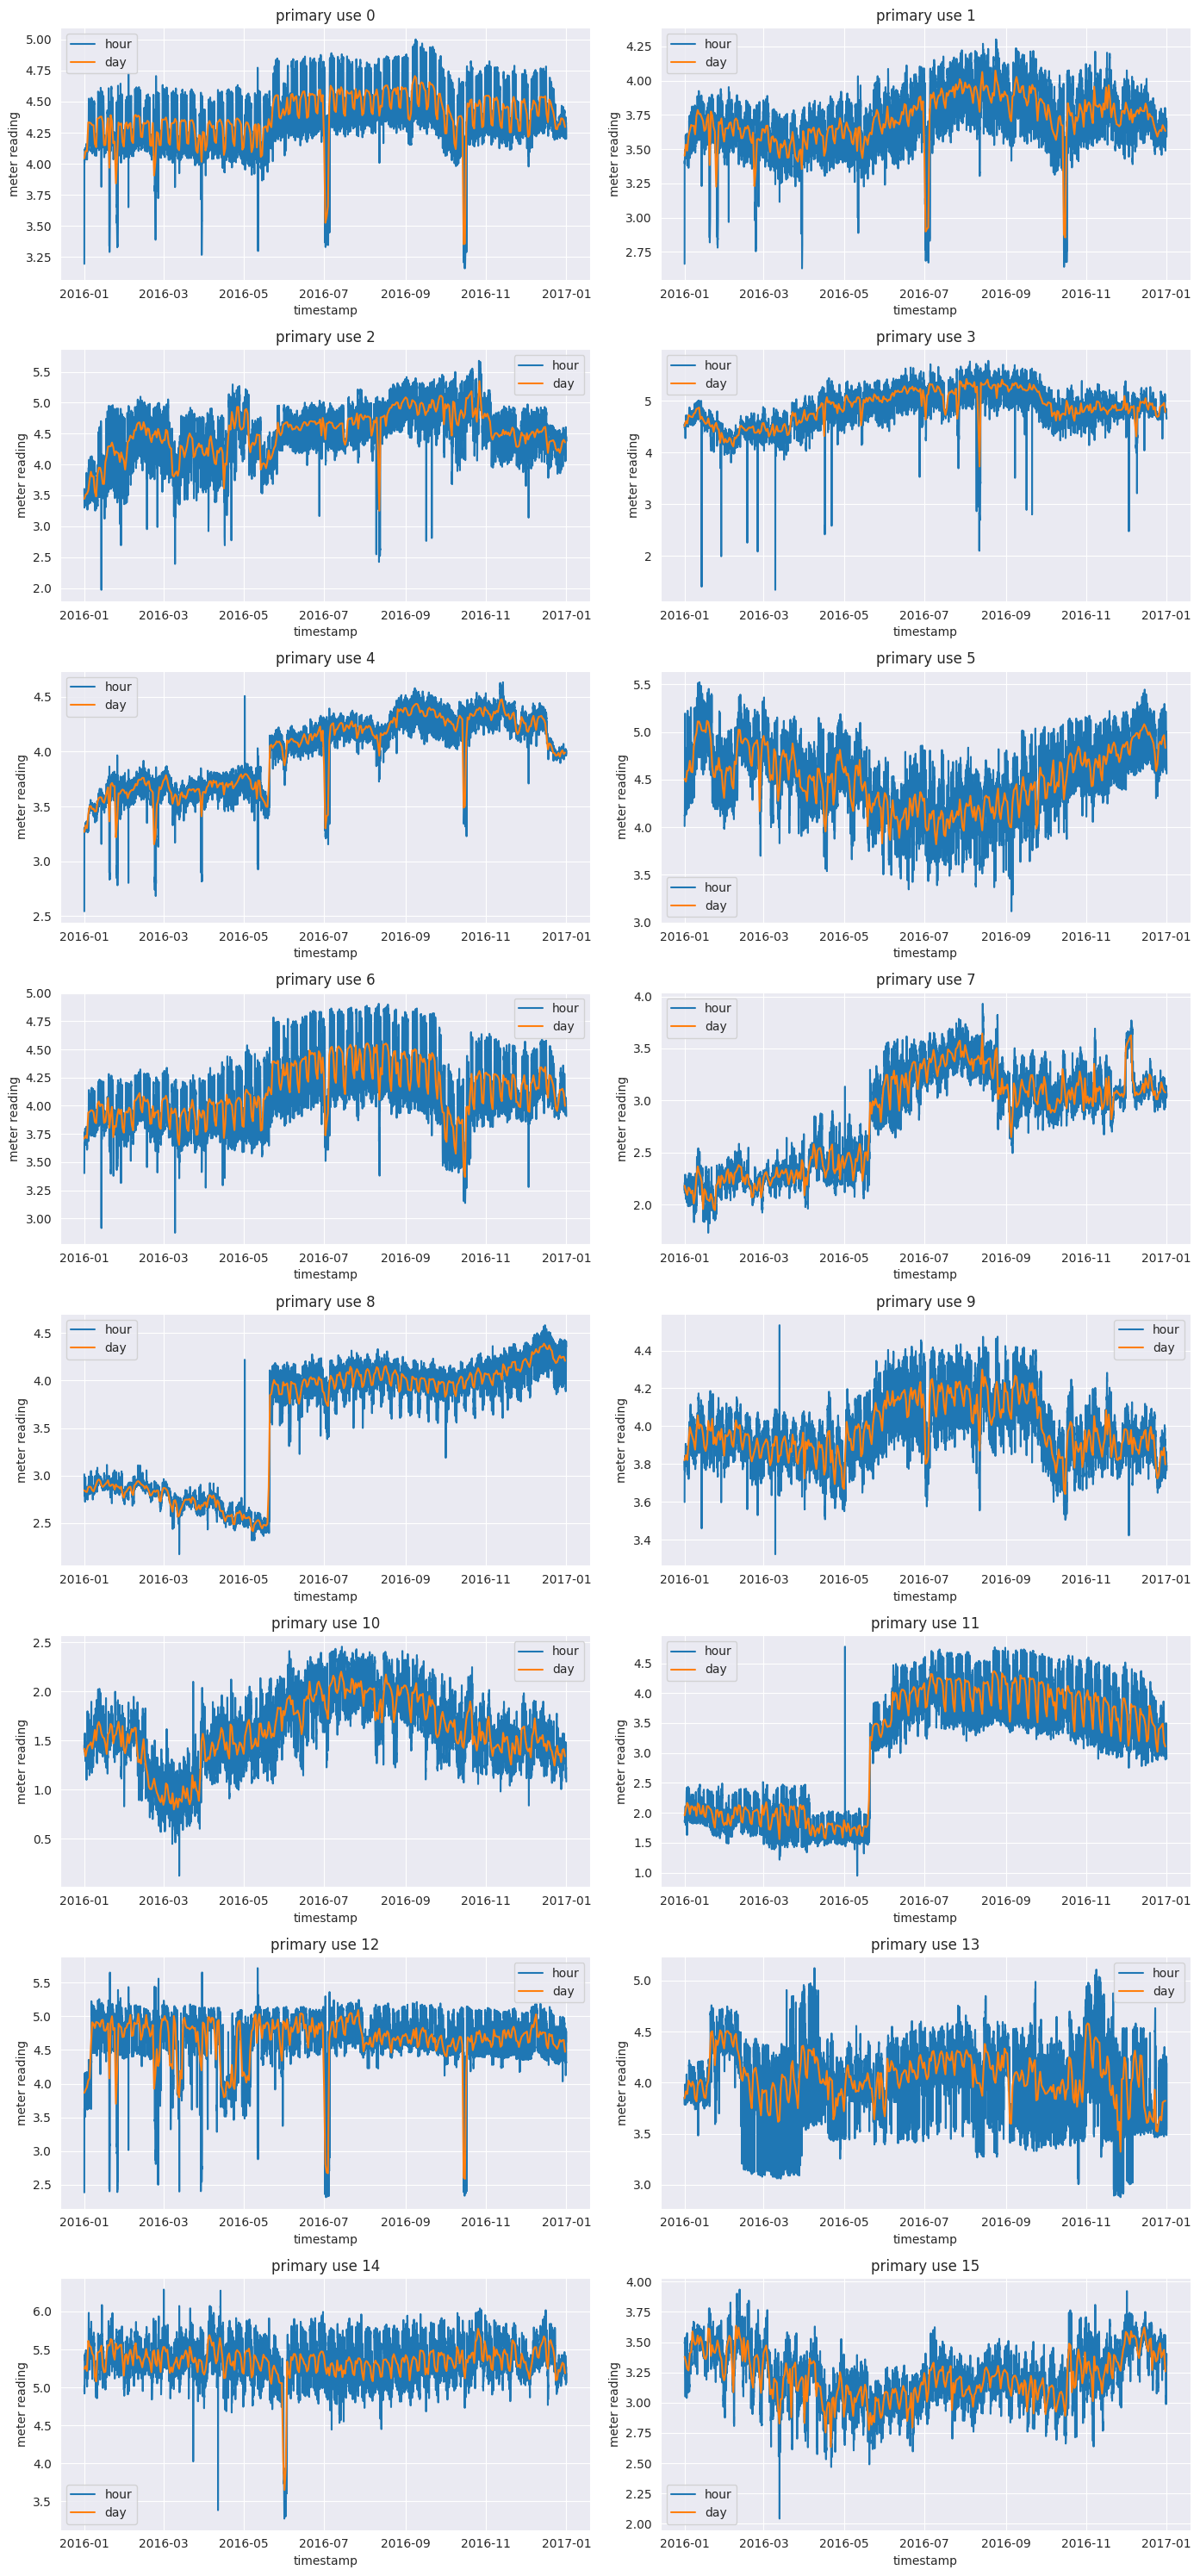

In [113]:
plot_grouped_data(train_merge, 'primary use', range(16), 'meter reading', 'mean', 8, 2, (14, 30)) #please check 

building_id

<Axes: xlabel='building id', ylabel='count'>

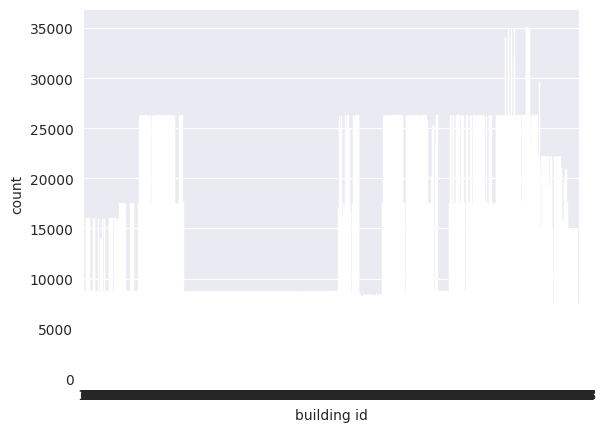

In [96]:
sns.countplot(x="building id",data=train_merge)

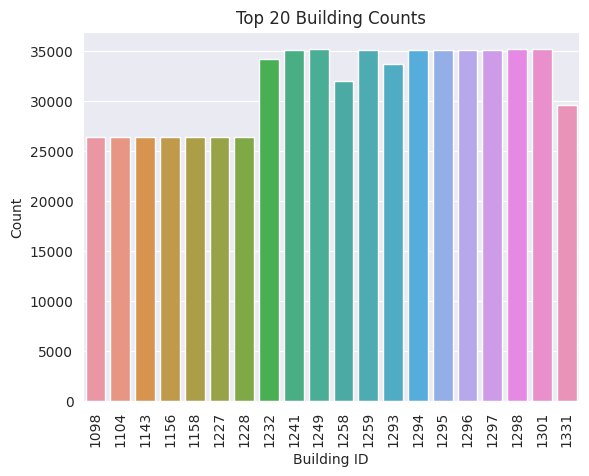

In [97]:
top_20_counts = train_merge['building id'].value_counts().head(20)
sns.barplot(x=top_20_counts.index, y=top_20_counts.values)
plt.title('Top 20 Building Counts')
plt.xlabel('Building ID')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

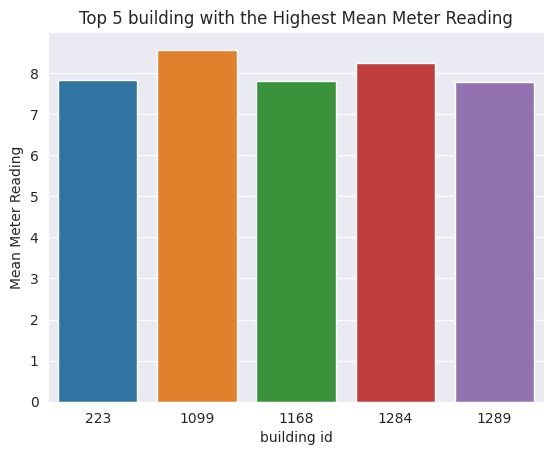

In [98]:
grouped_data = train_merge.groupby('building id')['meter reading'].mean()
top_5_meters = grouped_data.sort_values(ascending=False).head(5)
sns.barplot(x=top_5_meters.index, y=top_5_meters.values)
plt.xlabel('building id')
plt.ylabel('Mean Meter Reading')
plt.title('Top 5 building with the Highest Mean Meter Reading')
plt.show()

year_built

- building_id 1099 has the highest mean of meter_reading

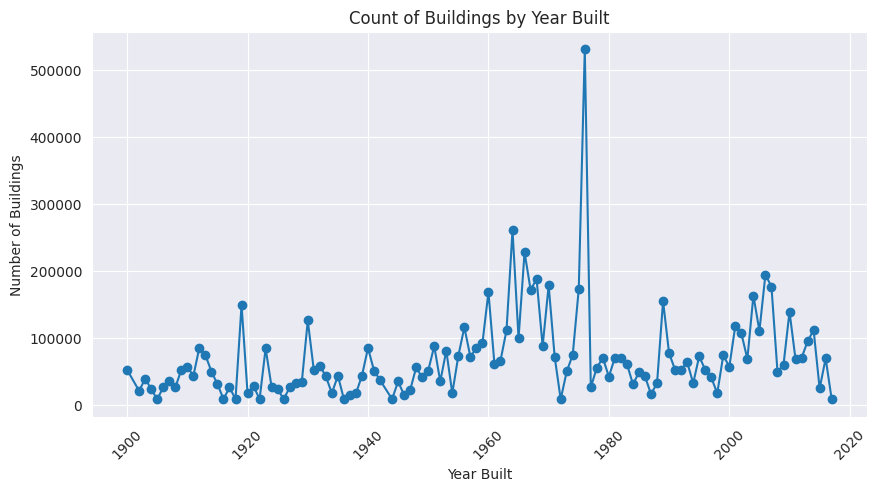

In [99]:
year_counts = train_merge.groupby('year built')['building id'].count()

# Create a line chart of the counts over time
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(year_counts.index, year_counts.values, marker='o')

# Set the x-axis label to "Year Built" and the y-axis label to "Number of Buildings"
ax.set_xlabel('Year Built')
ax.set_ylabel('Number of Buildings')

# Set the title to "Count of Buildings by Year Built"
ax.set_title('Count of Buildings by Year Built')

# Rotate the x-axis tick labels by 45 degrees to avoid overlapping labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

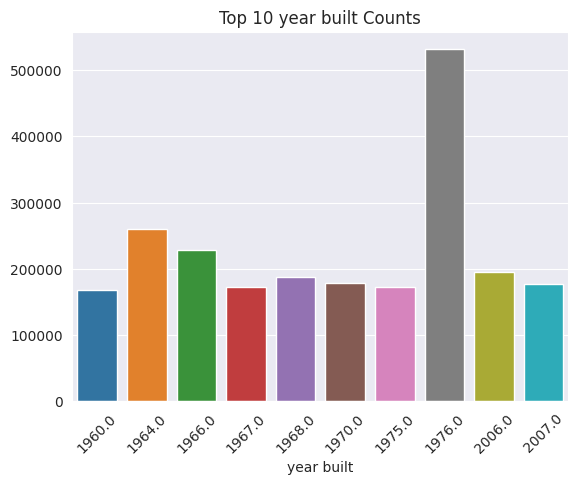

In [100]:
top_10_counts = train_merge['year built'].value_counts().head(10)
sns.barplot(x=top_10_counts.index, y=top_10_counts.values)
plt.title('Top 10 year built Counts')
plt.xticks(rotation=45)
plt.xlabel('year built')
plt.show()

- Data shows frequency unless year_built 1976

cloud_coverage

Text(0.5, 1.0, 'Count values every cloud coverage ')

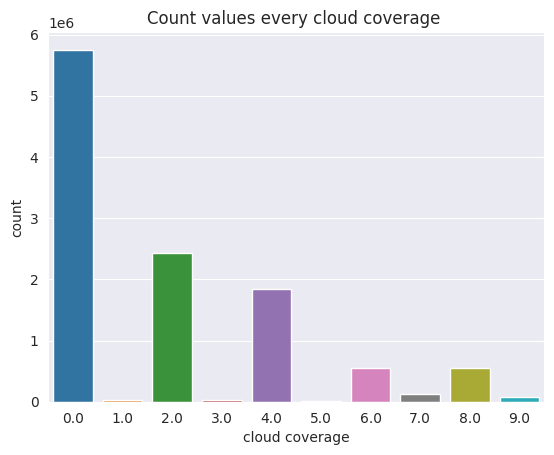

In [101]:
sns.countplot(x="cloud coverage", data=train_merge)
plt.title('Count values every cloud coverage ')

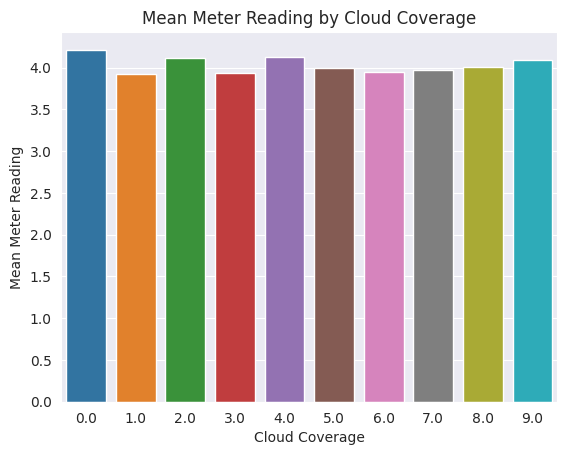

In [102]:
# Calculate the mean meter reading for each level of cloud coverage
mean_reading_by_cloud = train_merge.groupby('cloud coverage')['meter reading'].mean()

# Create a bar plot of the mean meter reading by cloud coverage
sns.barplot(x=mean_reading_by_cloud.index, y=mean_reading_by_cloud.values)
plt.title('Mean Meter Reading by Cloud Coverage')
plt.xlabel('Cloud Coverage')
plt.ylabel('Mean Meter Reading')
plt.show()

- cloud_coverage seem has the same mean of meter_reading

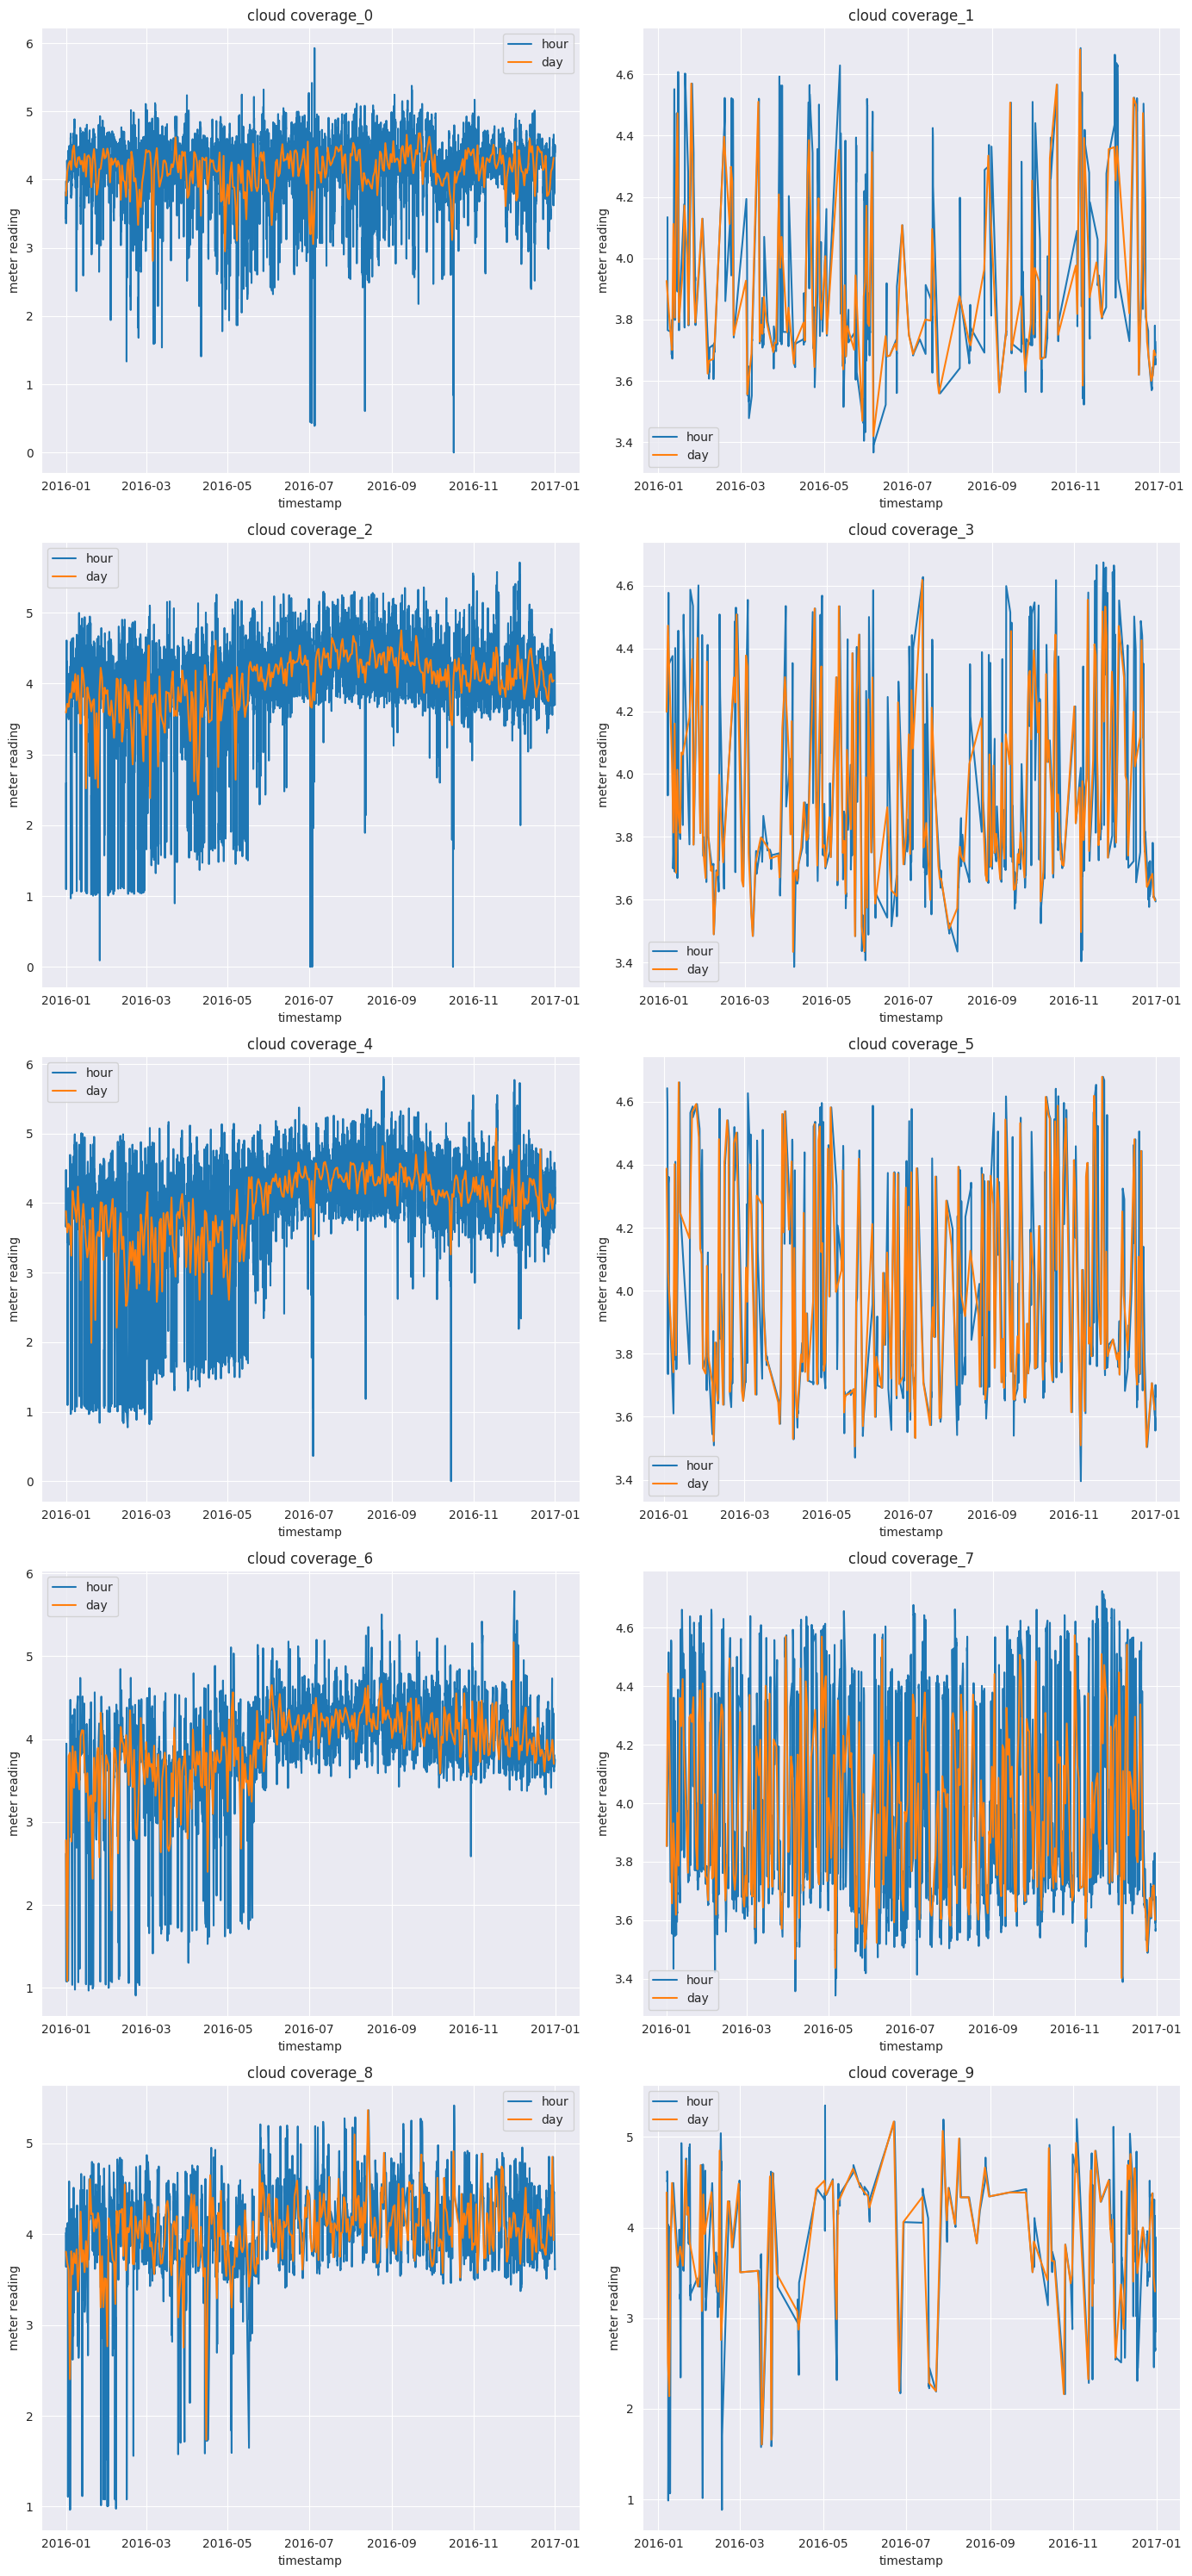

In [103]:
plot_grouped_data(train_merge,'cloud coverage',range(11),'meter reading','mean',5,2,(14,30))

floor_count

/tmp/ipykernel_41843/703776103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floor_count['floor count'] = floor_count['floor count'].astype(int)


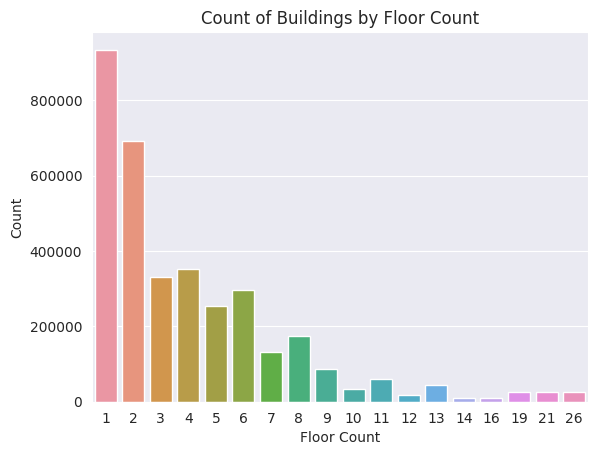

In [109]:
floor_count = train_merge.dropna(subset=['floor count'])
floor_count['floor count'] = floor_count['floor count'].astype(int)
sns.countplot(x='floor count', data=floor_count)
plt.title('Count of Buildings by Floor Count')
plt.xlabel('Floor Count')
plt.ylabel('Count')
plt.show()


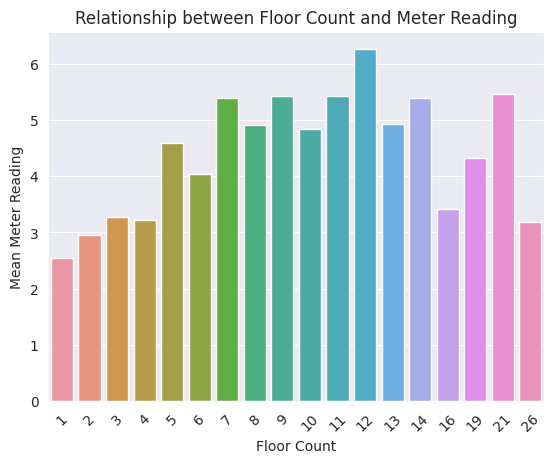

In [105]:
# Filter out the rows where floor count is -1
floor_count = train_merge[train_merge['floor count'] != -1]

# Group the data by floor count and calculate the mean meter reading
grouped_data = floor_count.groupby('floor count')['meter reading'].mean()

# Create the bar plot
sns.barplot(x=grouped_data.index.astype(int), y=grouped_data.values)
plt.xlabel('Floor Count')
plt.ylabel('Mean Meter Reading')
plt.title('Relationship between Floor Count and Meter Reading')
plt.xticks(rotation=45)
plt.show()

- large number of data in floor_count 1.0
- floor_count with 12.0 has the highest mean of meter_reading

wind_direction

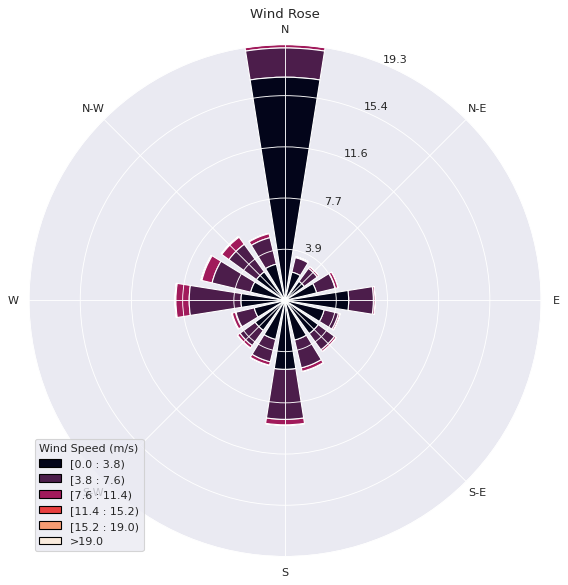

In [106]:
# Create a WindroseAxes object
ax = WindroseAxes.from_ax()

# Plot the wind data
ax.bar(train_merge['wind direction'], train_merge['wind speed'], normed=True, opening=0.8, edgecolor='white')

# Add legend and title
ax.legend(title='Wind Speed (m/s)')
ax.set_title('Wind Rose')

# Show the chart
plt.show()

- wind_direction 0 is probably because of the lack of values

In [107]:
timestamp_counts = train_merge.groupby('timestamp')['meter reading'].size()
# find the timestamp with the highest count of meter readings
max_count_timestamp = timestamp_counts.idxmax()
print('Timestamp with highest count:', max_count_timestamp)


Timestamp with highest count: 2016-12-27 22:00:00
